#             Titanic Survival Prediction

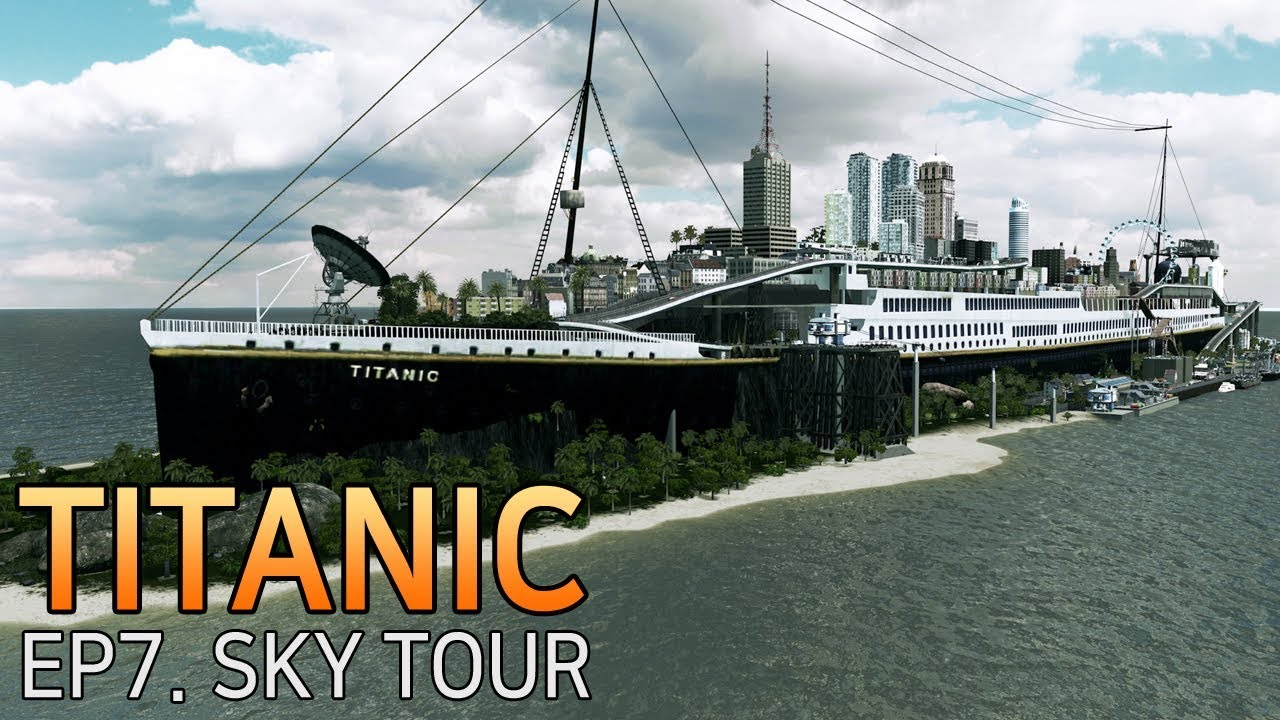

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("titanic_train.csv")

In [4]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.drop('Cabin',axis = 1)

In [9]:
df = df.drop(['PassengerId','Ticket','Name'],axis = 1)

In [10]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [11]:
#finding object columns and numerical columns
object_columns = df.select_dtypes(include = 'object').columns.tolist()
numerical_columns = df.select_dtypes(include = ['int', 'float']).columns.tolist()

print('Object columns:', object_columns)
print('\n')
print('Numerical columns:', numerical_columns)

Object columns: ['Sex', 'Embarked']


Numerical columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
#imputing with mean for numerical columns and mode for object columns
for feature in numerical_columns:
    df[feature].fillna(df[feature].mean(),inplace =True)
    
for feature in object_columns:
    df[feature].fillna(df[feature].mode()[0],inplace =True) 
    

In [13]:
#null values count is 0 here,that means imputation has been performed and no null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
#to print statistical information of numeric values
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [16]:
#To find no. of unique values in a particular column
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [17]:
for i in object_columns:
    print(i)
    print(df[i].unique())
    print("\n")

Sex
['male' 'female']


Embarked
['S' 'C' 'Q']




In [18]:
for i in object_columns:
    print(i)
    print(df[i].value_counts())
    print("\n")

Sex
male      577
female    314
Name: Sex, dtype: int64


Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64




countplot for: Sex


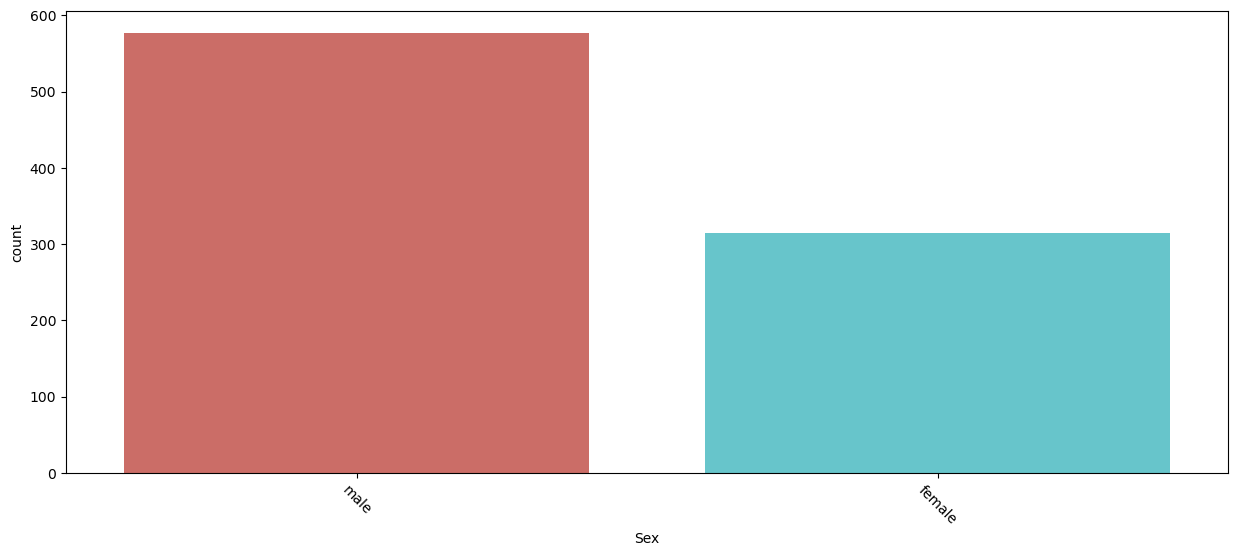

countplot for: Embarked


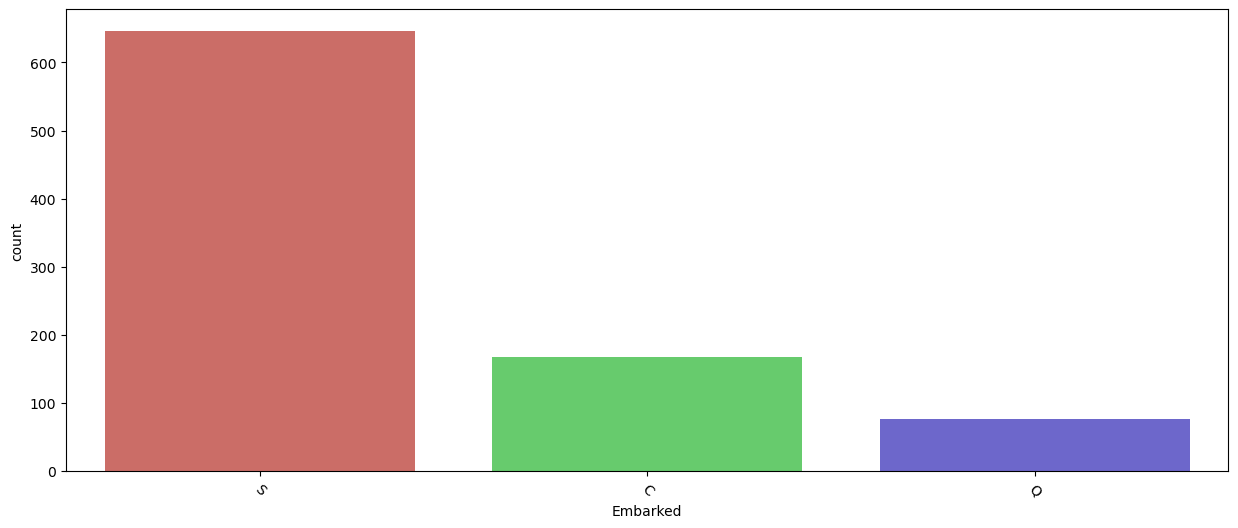

In [19]:
for i in object_columns:
    print("countplot for:",i)
    plt.figure(figsize=(15,6))
    sns.countplot(x = df[i],data = df,palette = 'hls')
    plt.xticks(rotation = -45)
    plt.show()

pieplot for: Sex


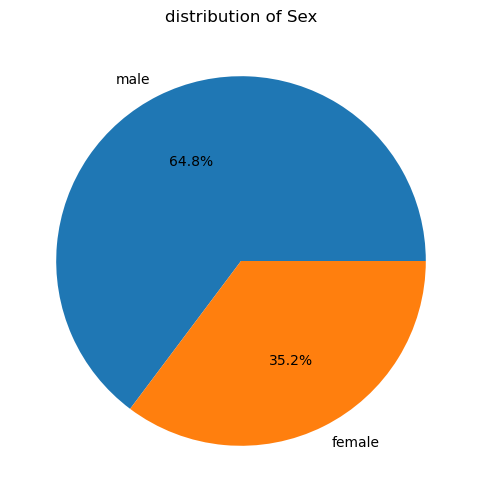



pieplot for: Embarked


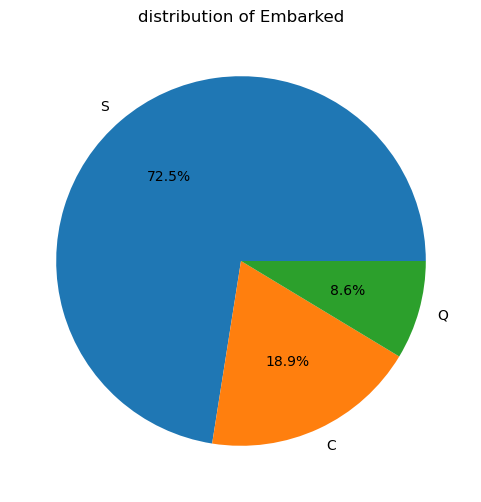

In [20]:
for i in object_columns:
    print("pieplot for:",i)
    plt.figure(figsize=(15,6))
    df[i].value_counts().plot(kind ='pie',autopct = '%1.1f%%')
    plt.title("distribution of "+i)
    plt.ylabel('')
    plt.show()
    print("\n")

In [21]:
for i in object_columns:
    fig = go.Figure(data=[go.Bar(x = df[i].value_counts().index,y = df[i].value_counts())])
    fig.update_layout(
    title = i,
    xaxis_title = i,
    yaxis_title = 'Count')
    fig.show()

In [22]:
for i in object_columns:
    print("pieplot for:",i)
    fig = px.pie(df,names = i,title = 'Distribution of'+i)
    fig.show()
    print("\n")

pieplot for: Sex




pieplot for: Embarked


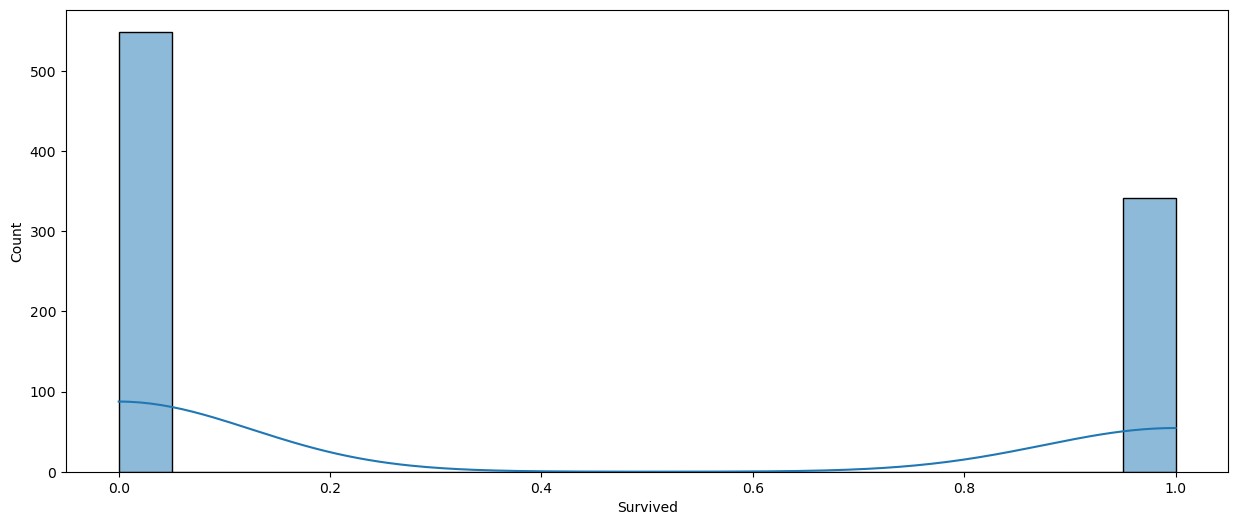

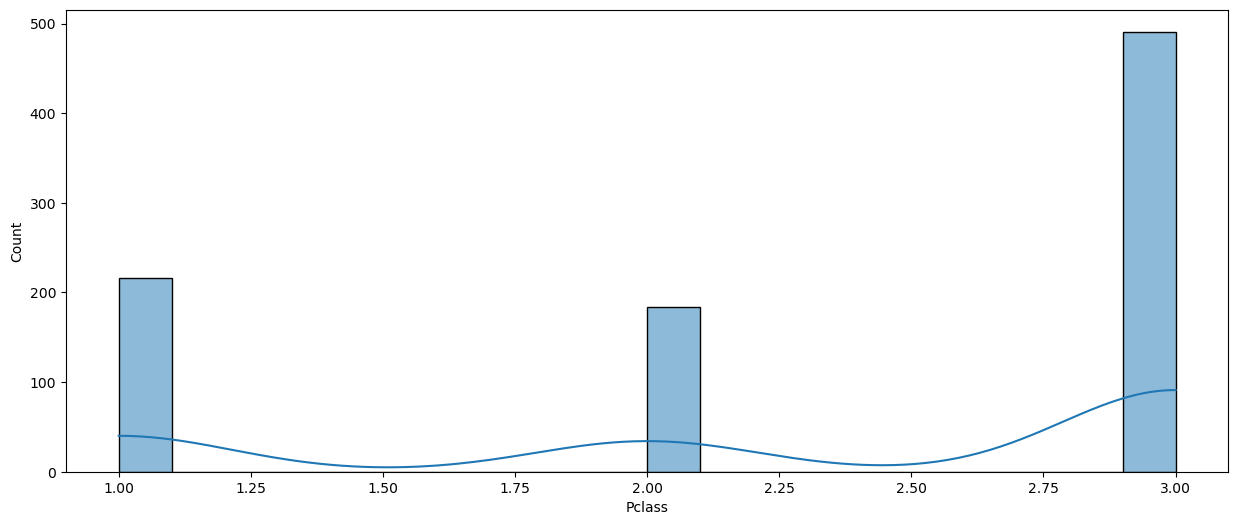

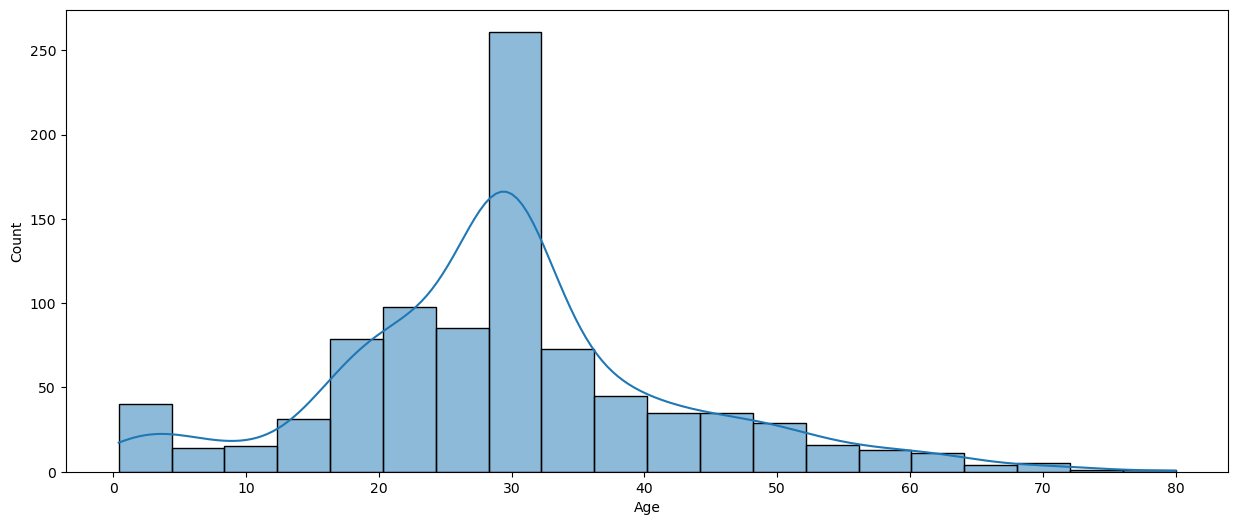

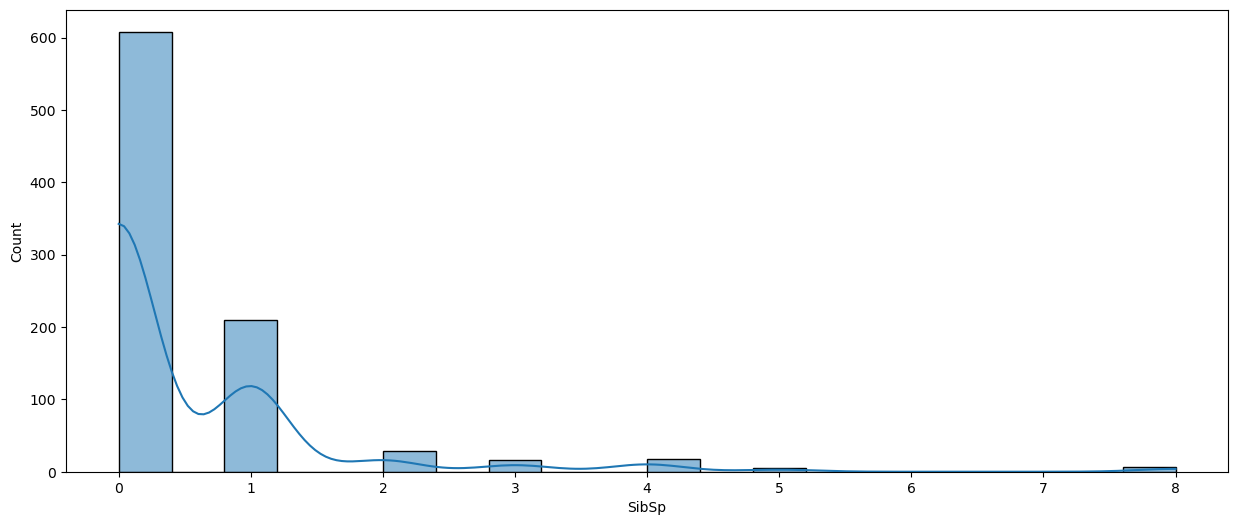

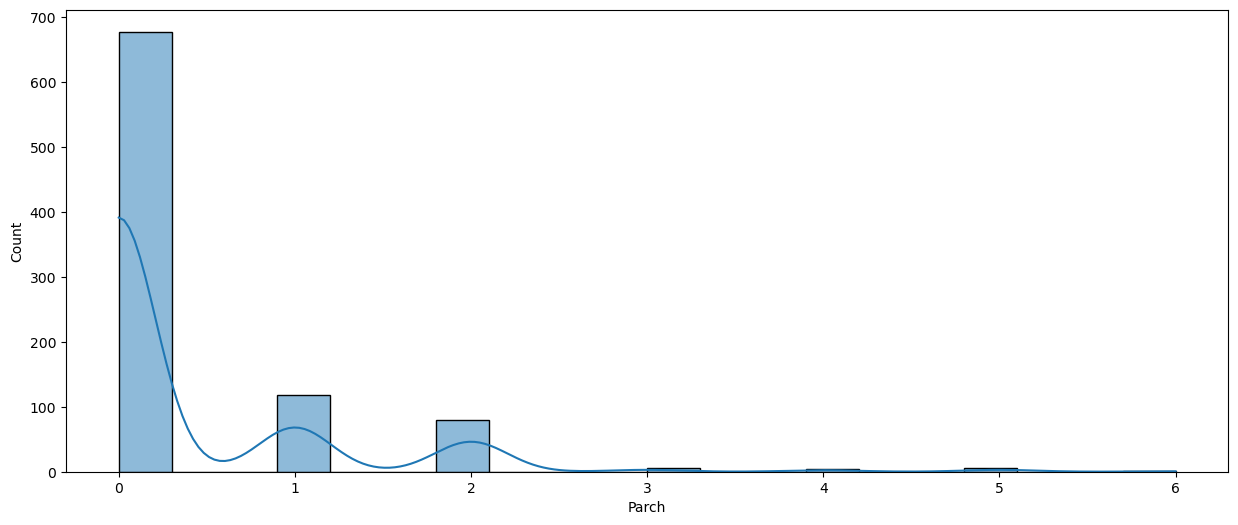

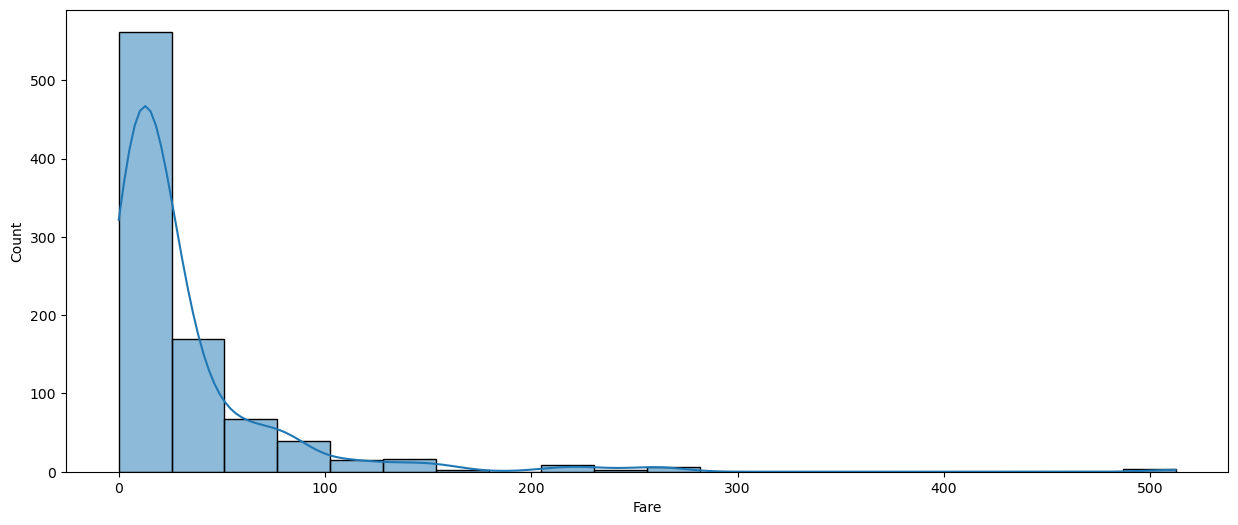

In [23]:
# for discrete values like survived ,pclass,Sibsp histplot is not looking good so we need to make countplot ,pyplot.
for i in numerical_columns:
    plt.figure(figsize = (15,6))
    sns.histplot(df[i],kde = True,bins = 20,palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

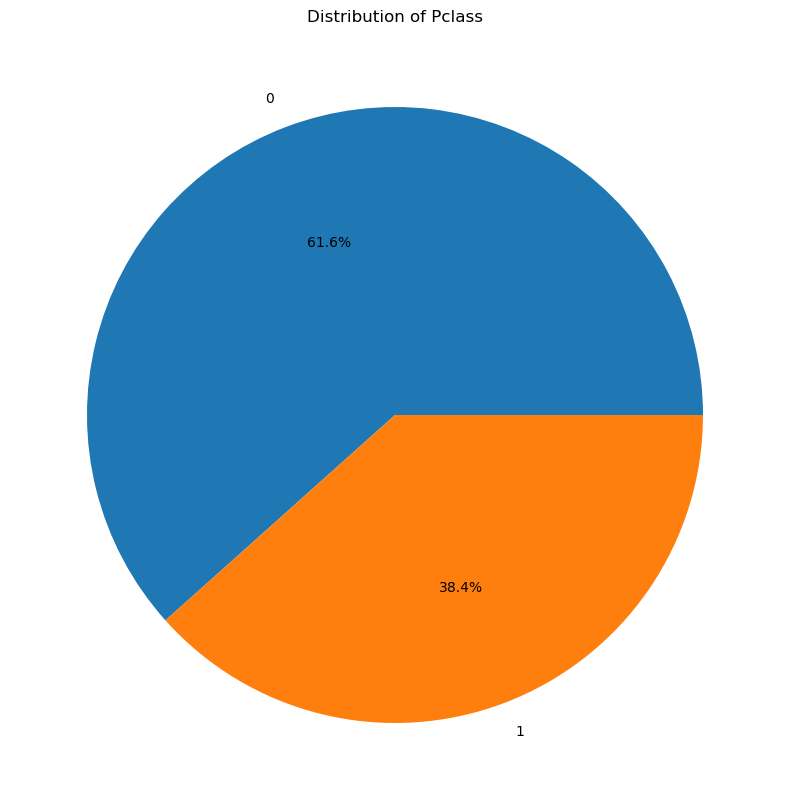

In [24]:
#pieplot for Survived
plt.figure(figsize=(20, 10))
df['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Pclass')
plt.ylabel('')
plt.show()

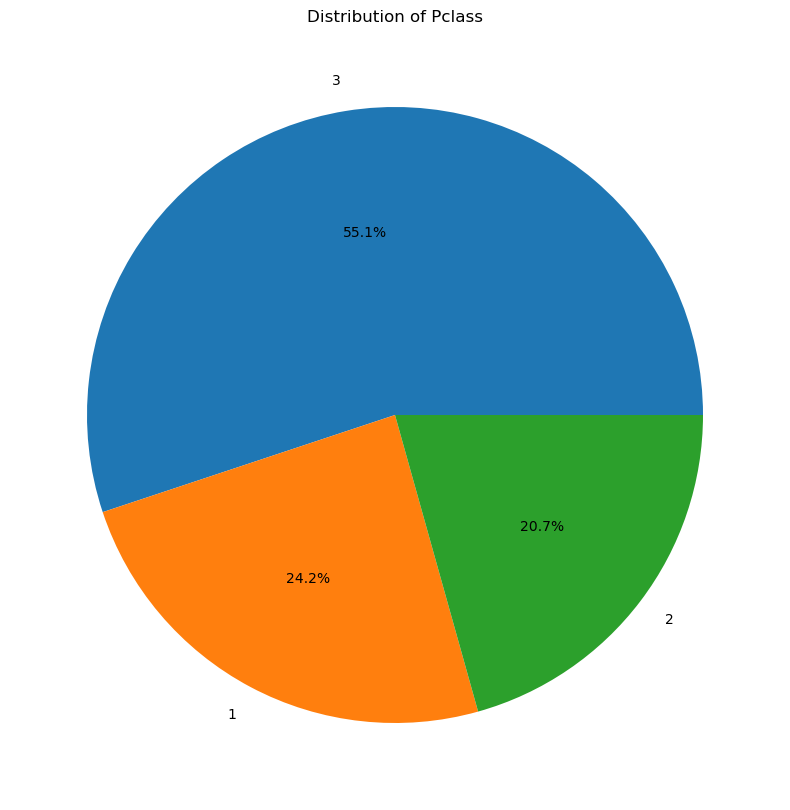

In [25]:
#pieplot for Pclass
plt.figure(figsize=(20, 10))
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Pclass')
plt.ylabel('')
plt.show()

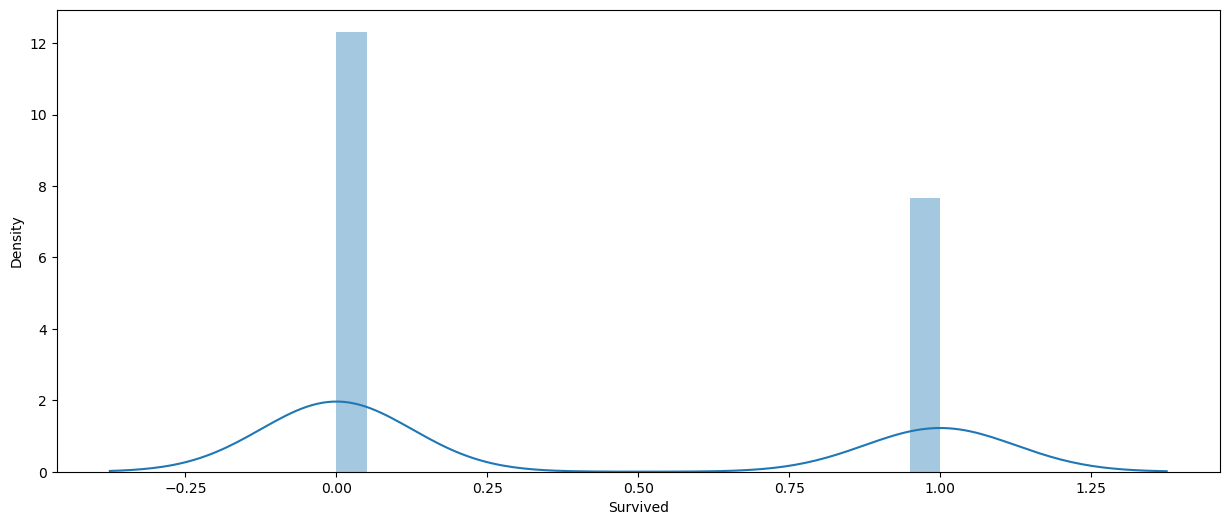

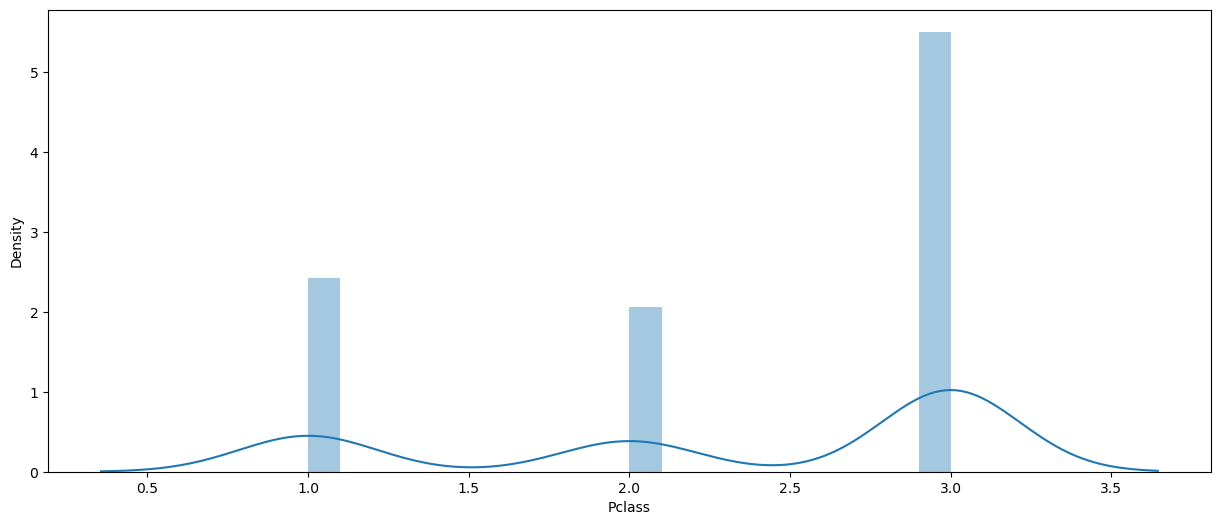

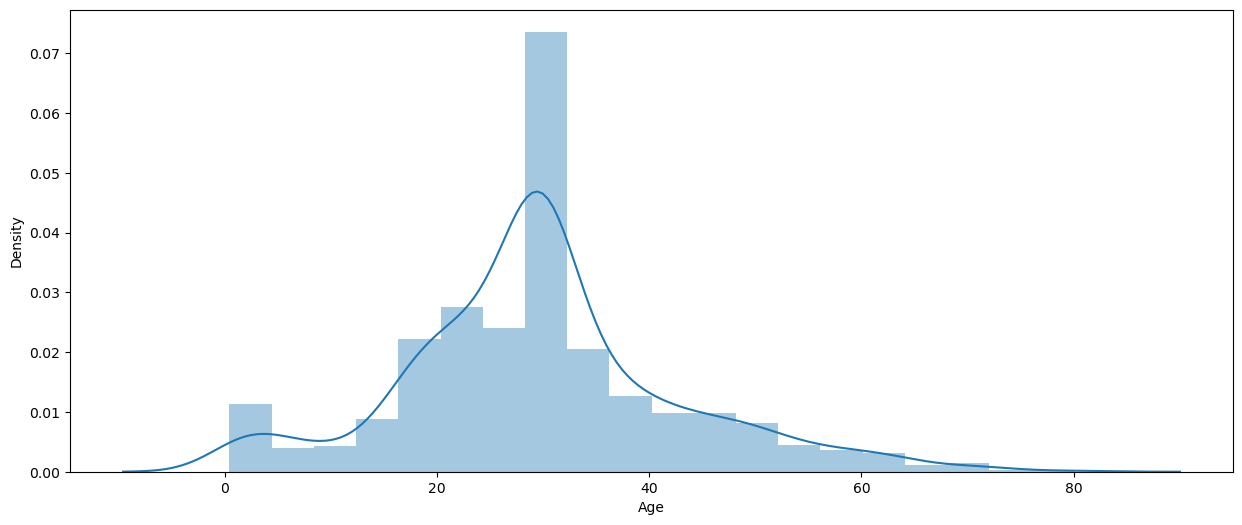

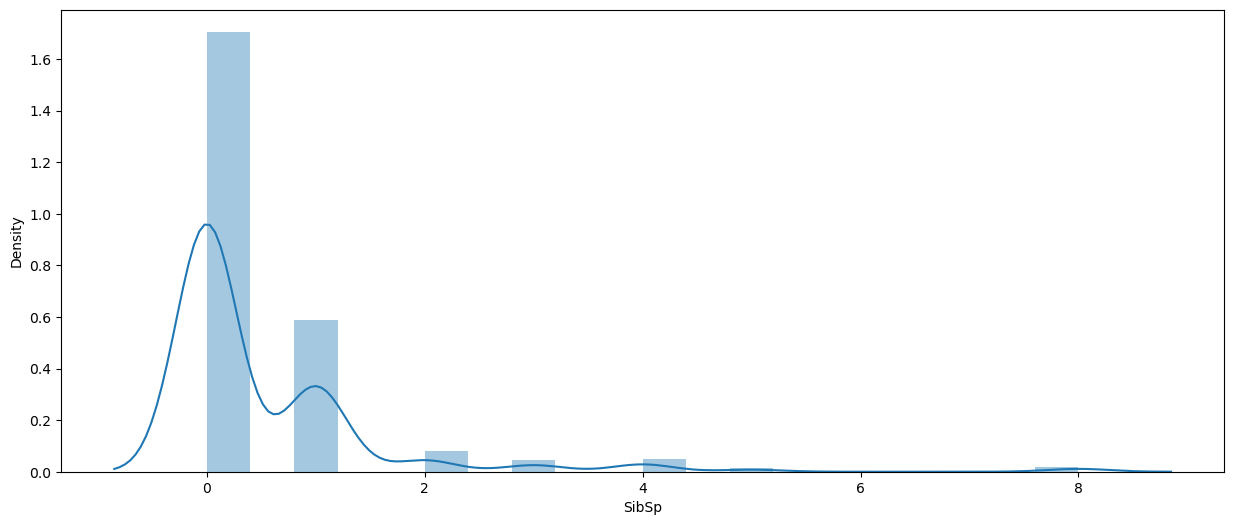

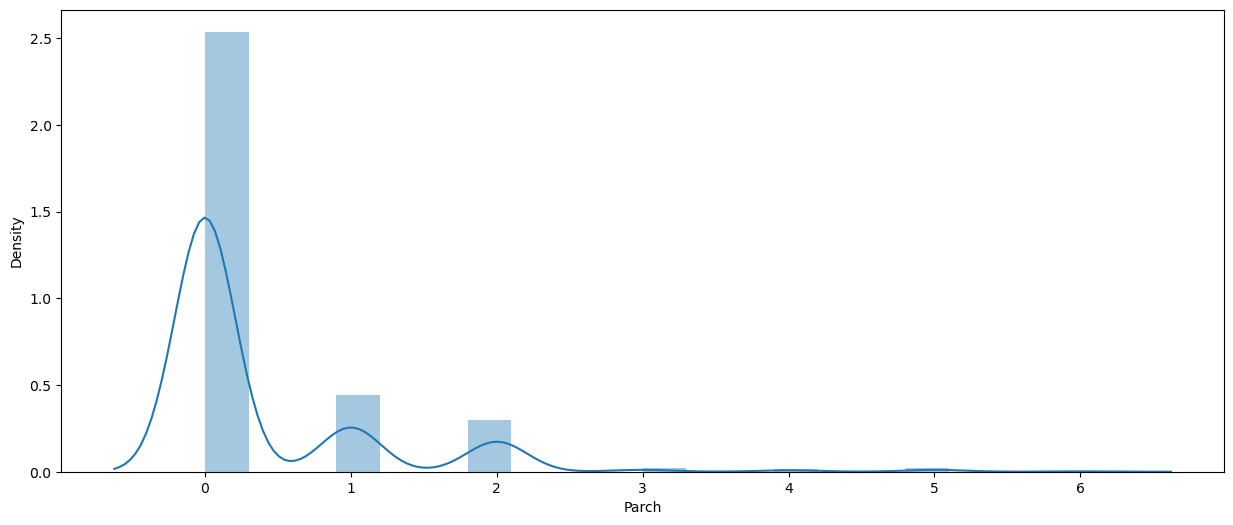

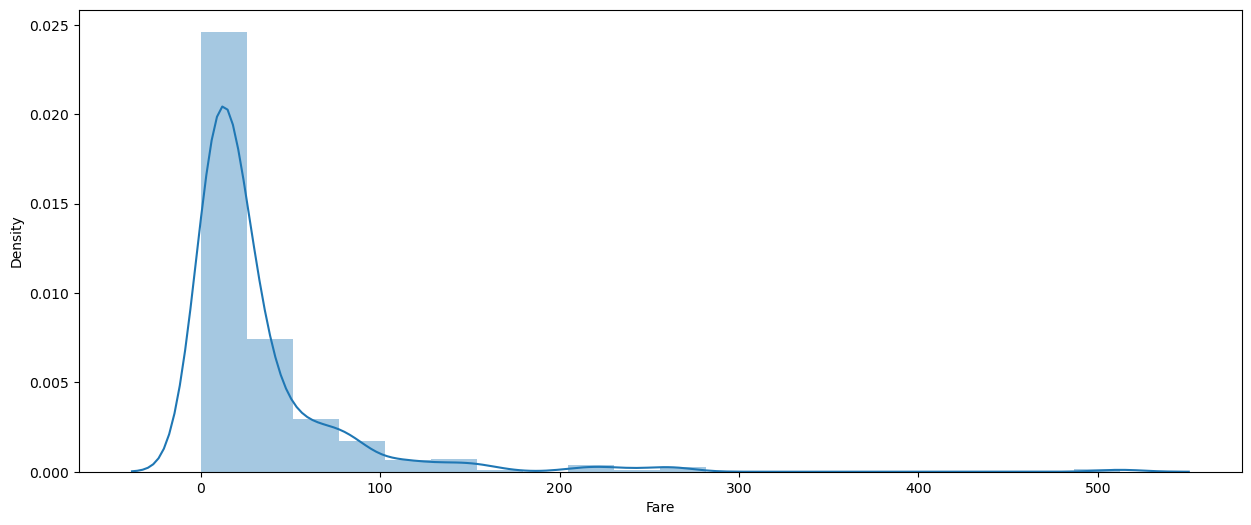

In [26]:
for i in numerical_columns:
    plt.figure(figsize = (15,6))
    sns.distplot(df[i],kde = True,bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

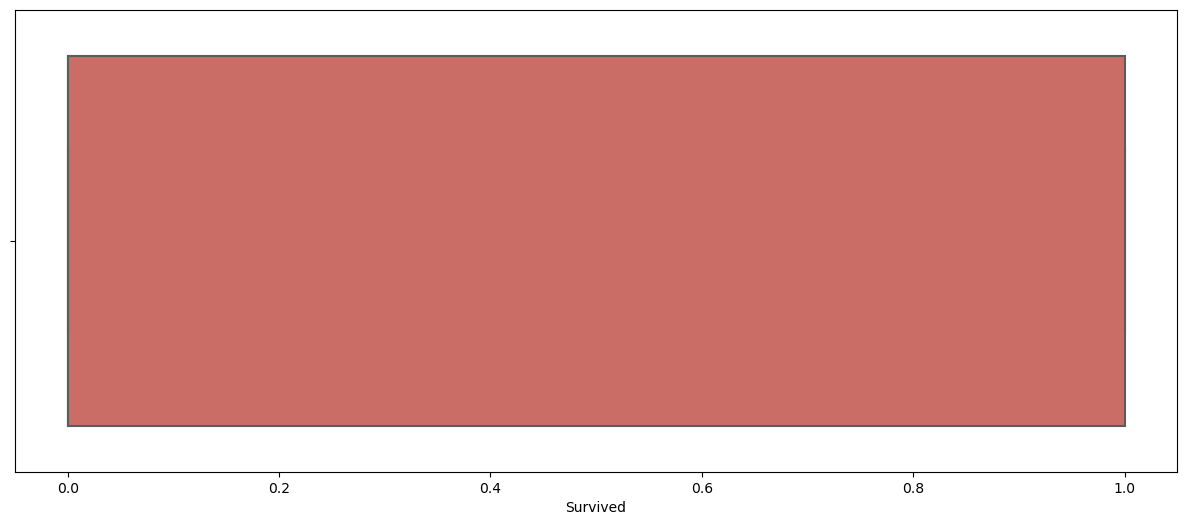

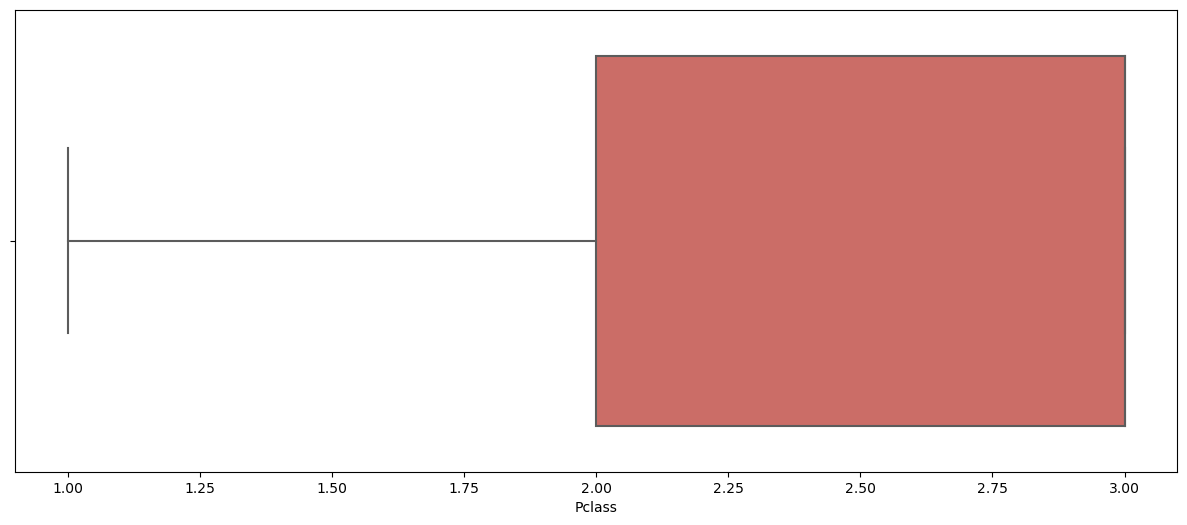

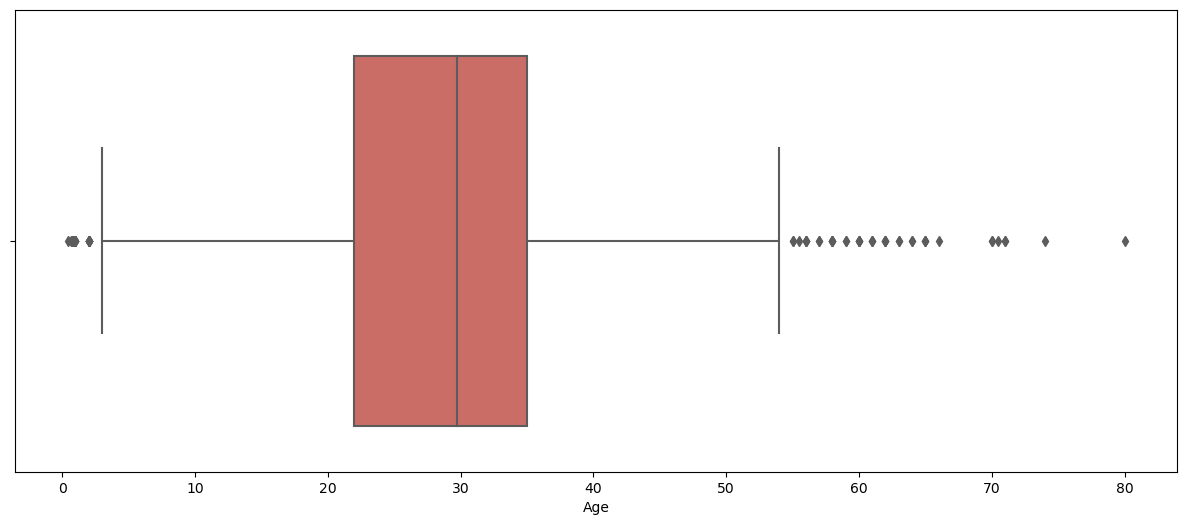

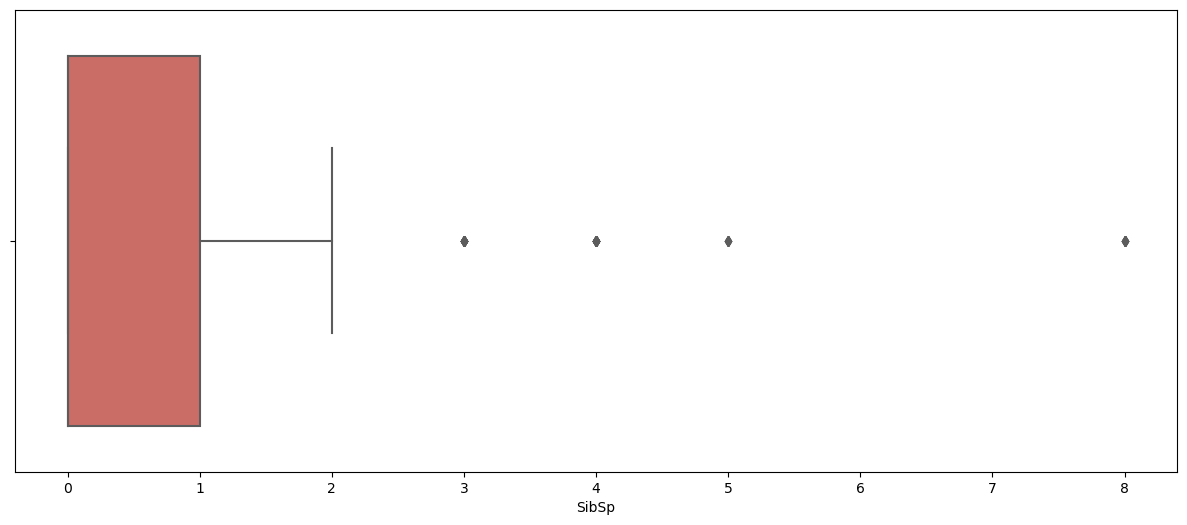

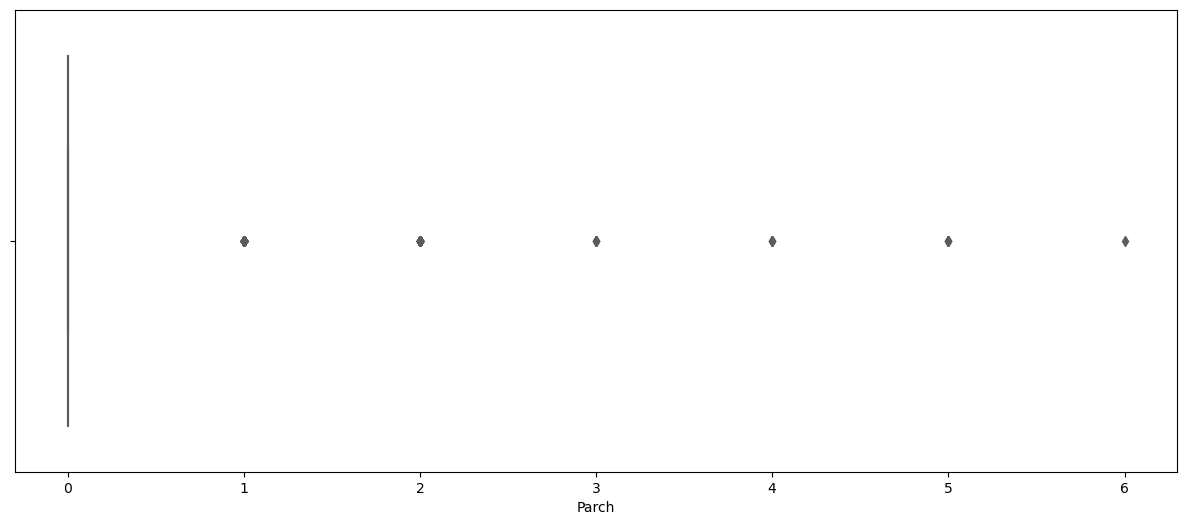

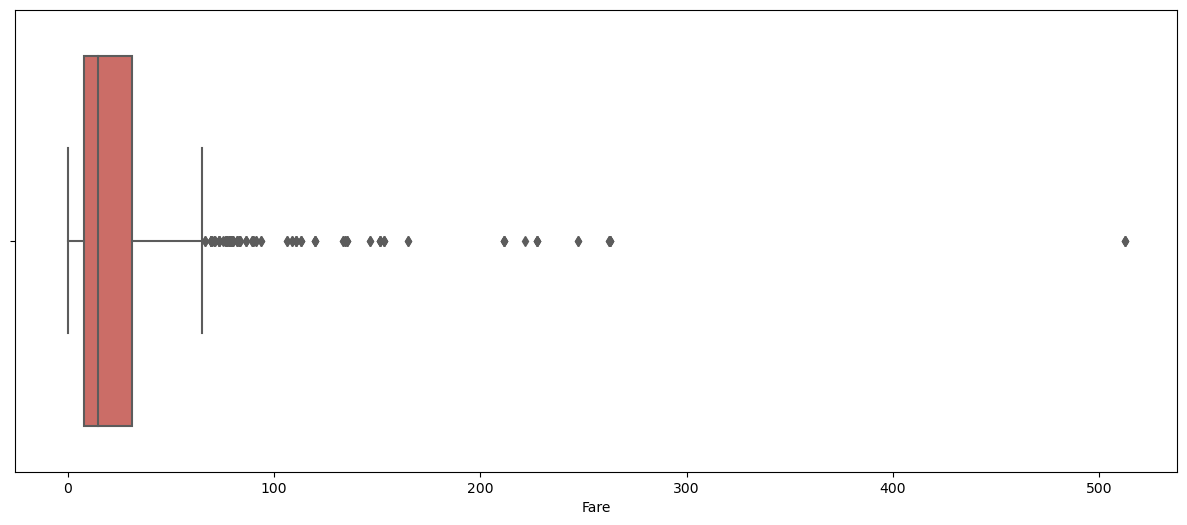

In [27]:
for i in numerical_columns:
    plt.figure(figsize = (15,6))
    sns.boxplot(x =df[i],data =df ,palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()
#the first box plot for survived below is irrelevant becoz discrete values

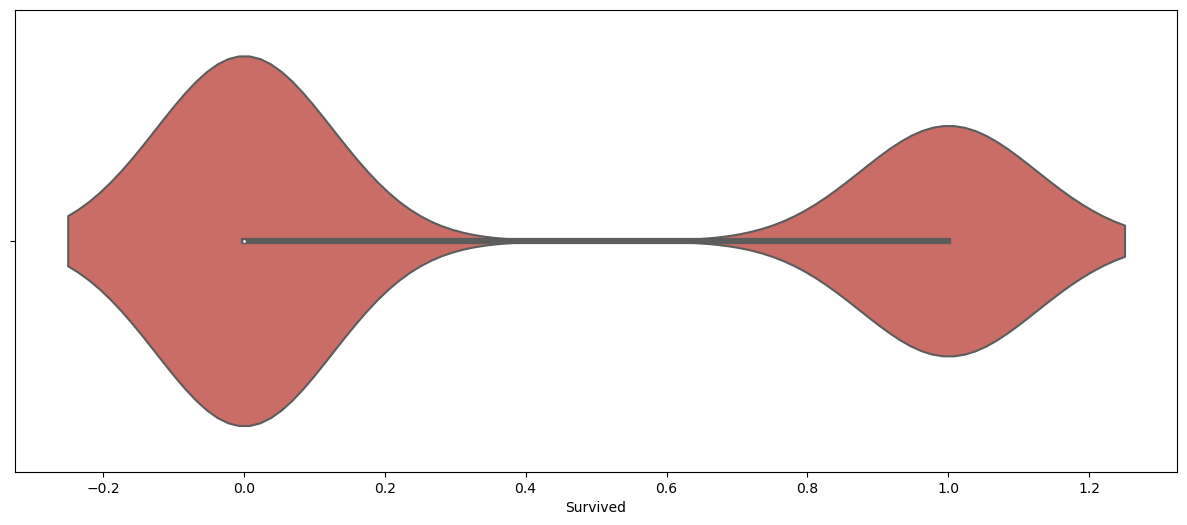

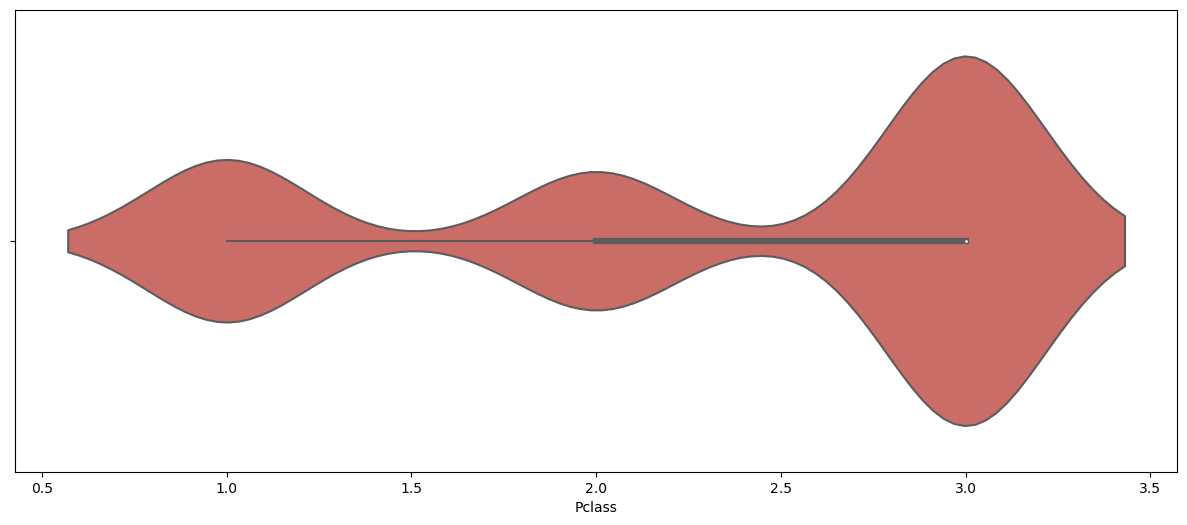

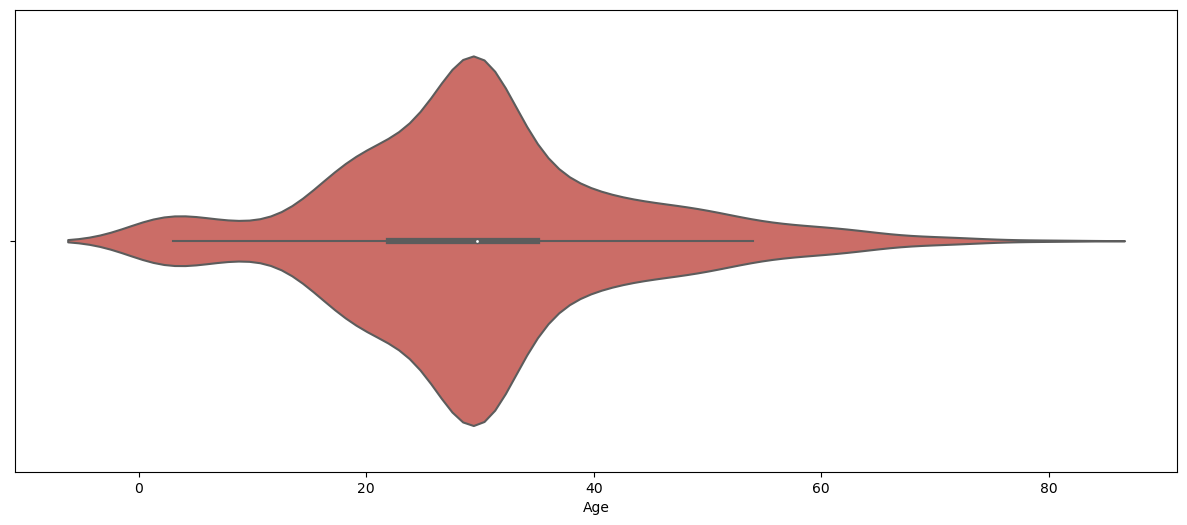

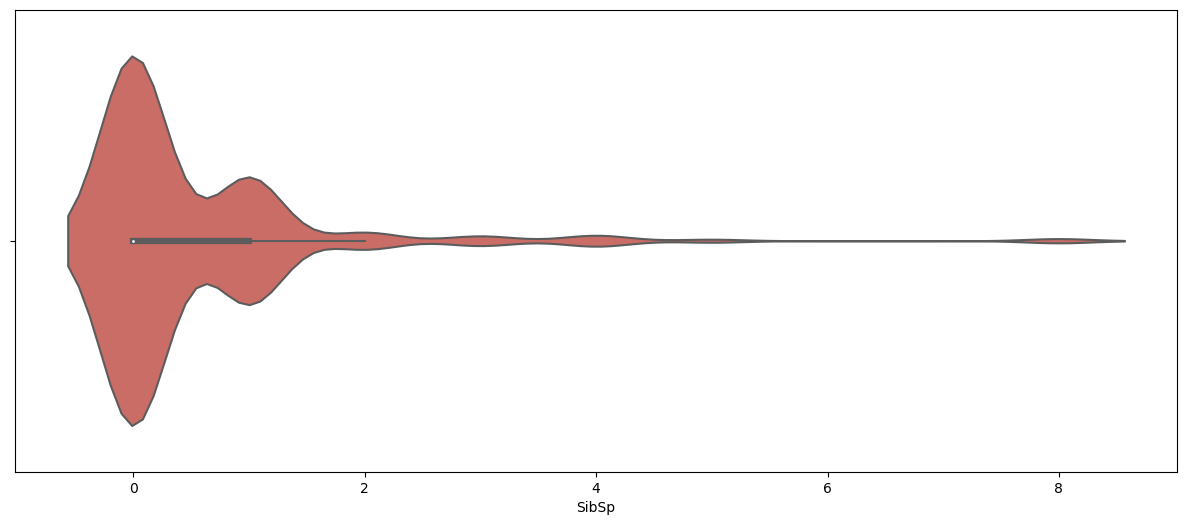

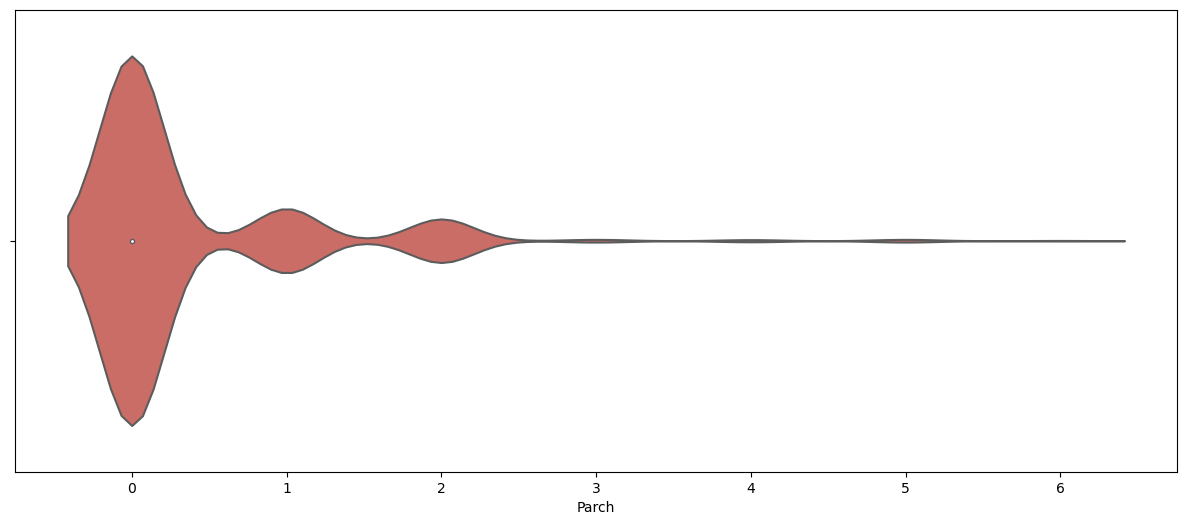

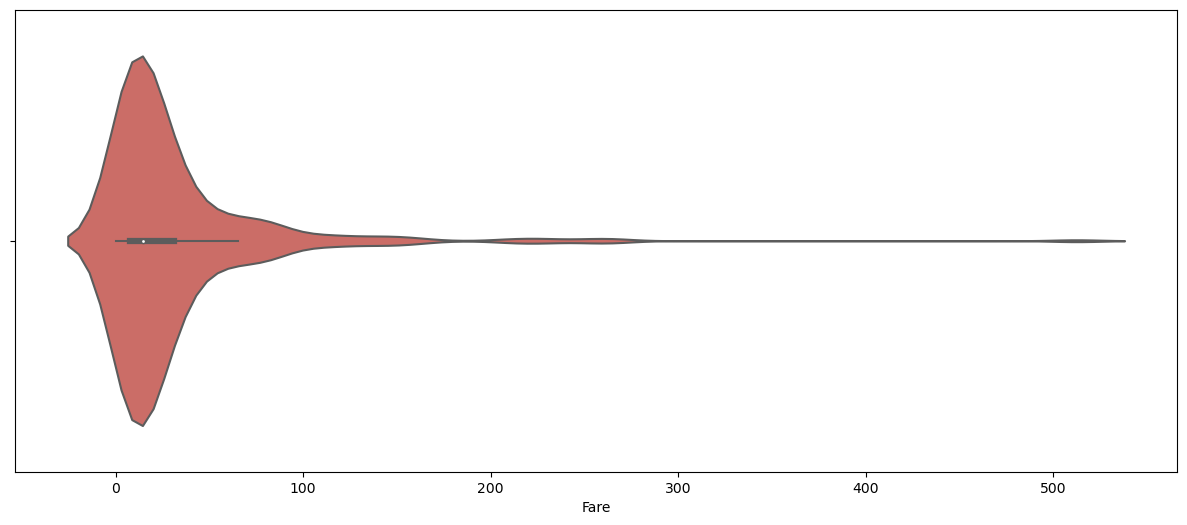

In [28]:
for i in numerical_columns:
    plt.figure(figsize = (15,6))
    sns.violinplot(x =df[i],data =df ,palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

In [29]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x = df[i],nbinsx = 20)])
    fig.update_layout(
    title = i,
    xaxis_title = i,
    yaxis_title = 'Count'
    )
fig.show()

In [30]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Box(x = df[i])])
    fig.update_layout(
    title = i,
    xaxis_title = i,
    yaxis_title = 'Value'
    )
fig.show()

In [31]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Violin(x = df[i])])
    fig.update_layout(
    title = i,
    xaxis_title = i,
    yaxis_title = 'Value'
    )
fig.show()

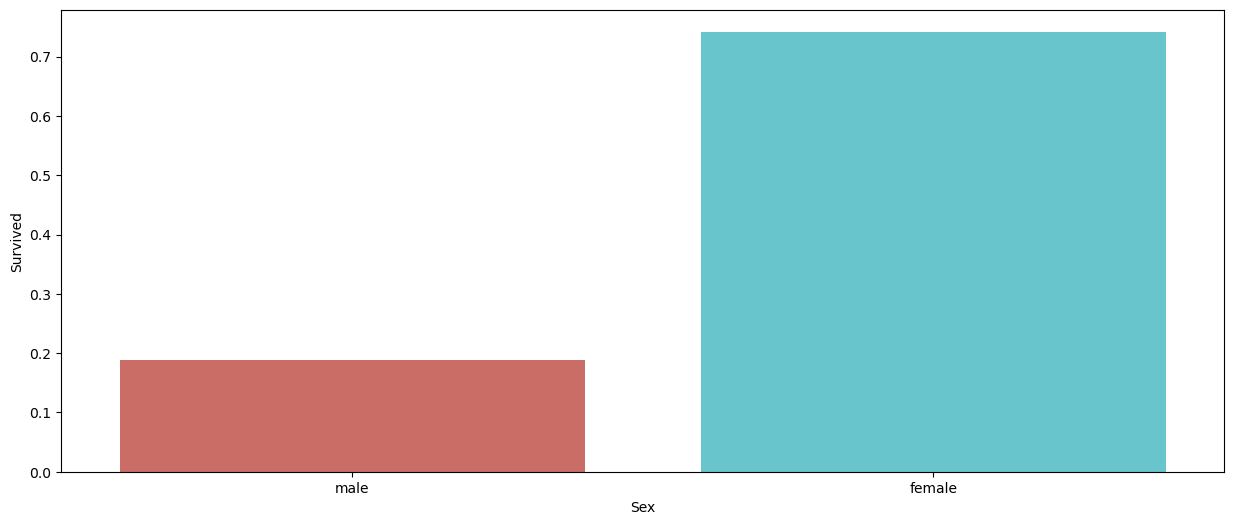

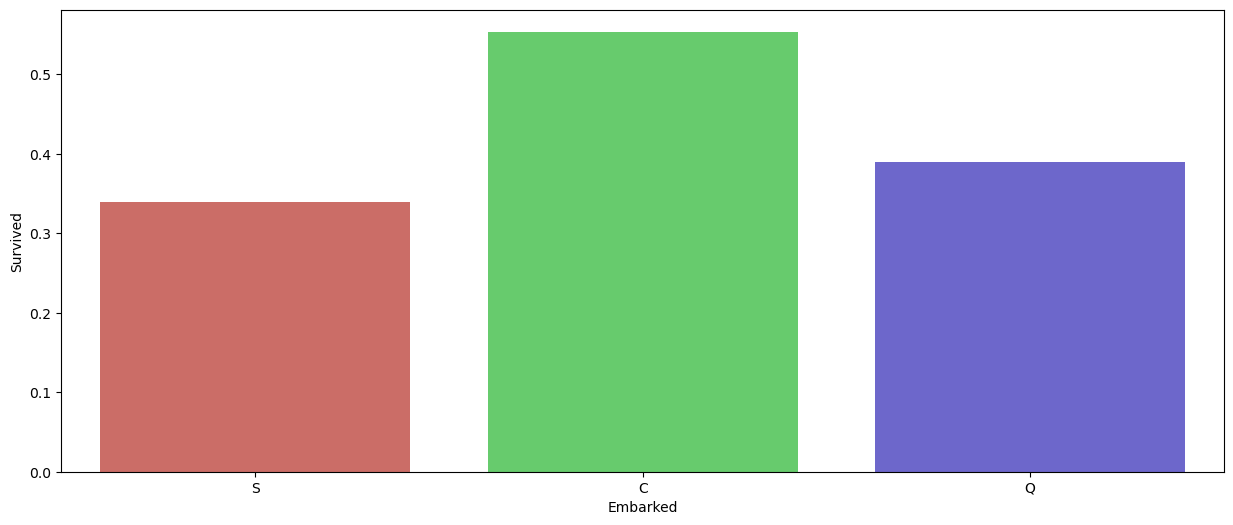

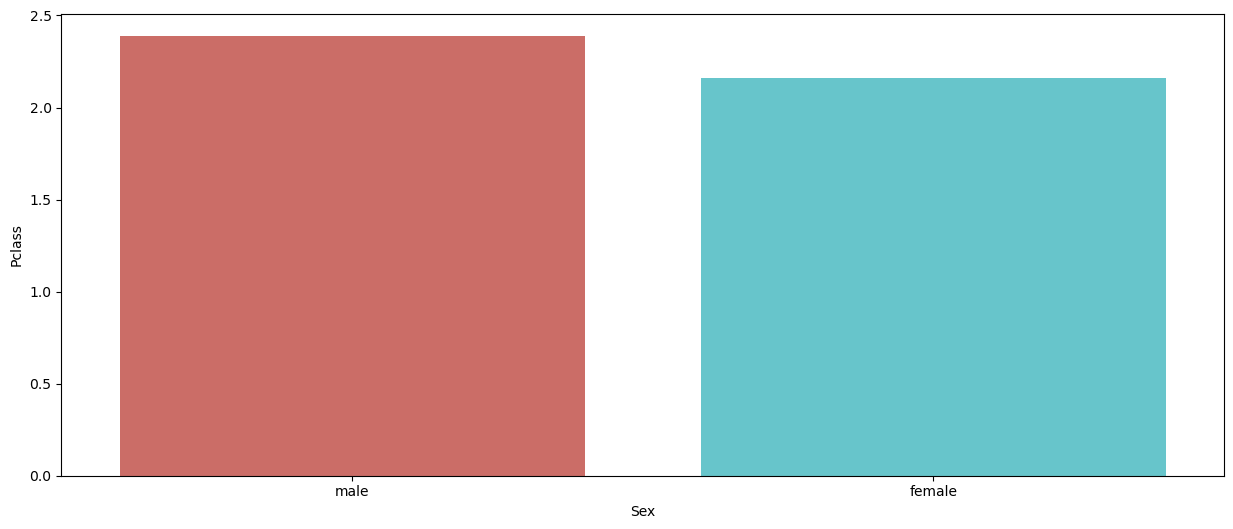

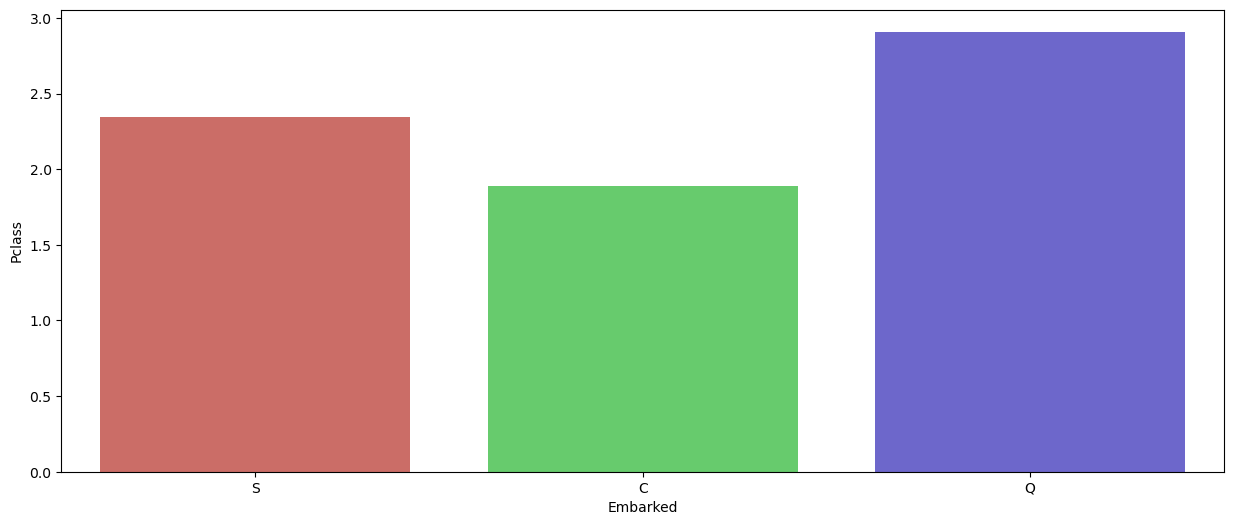

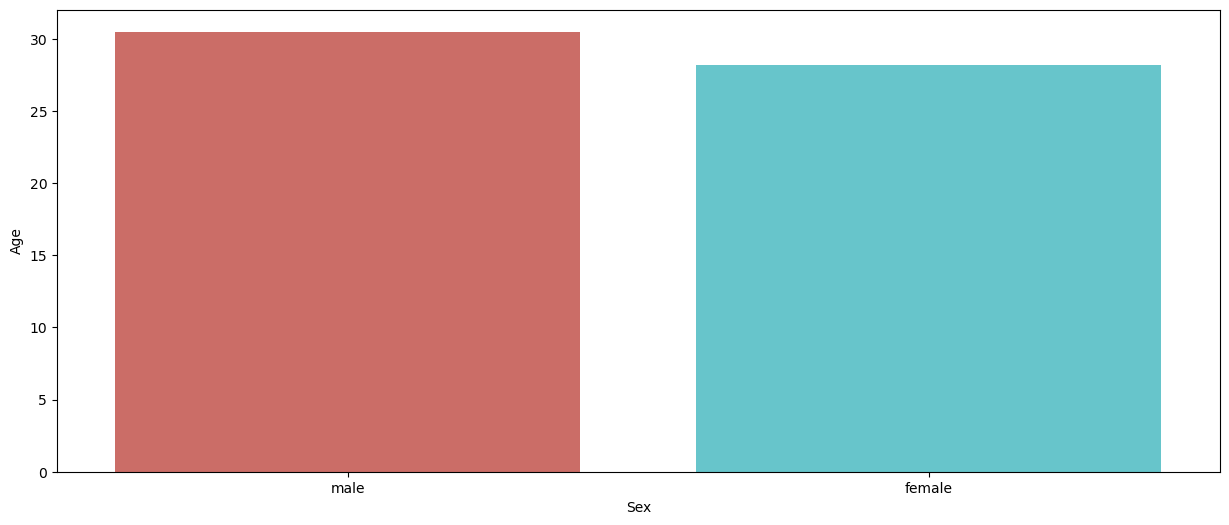

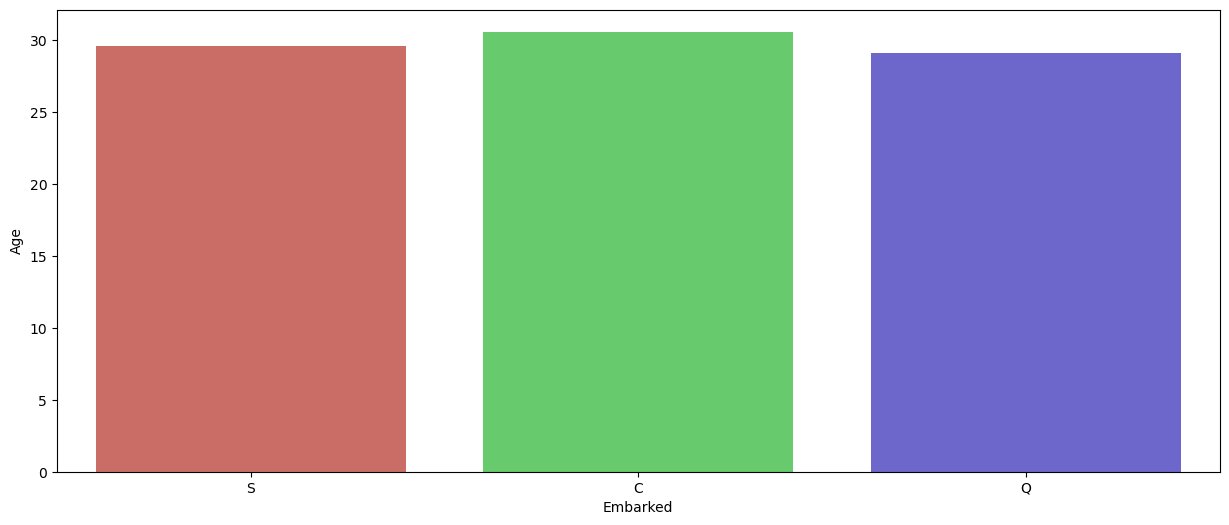

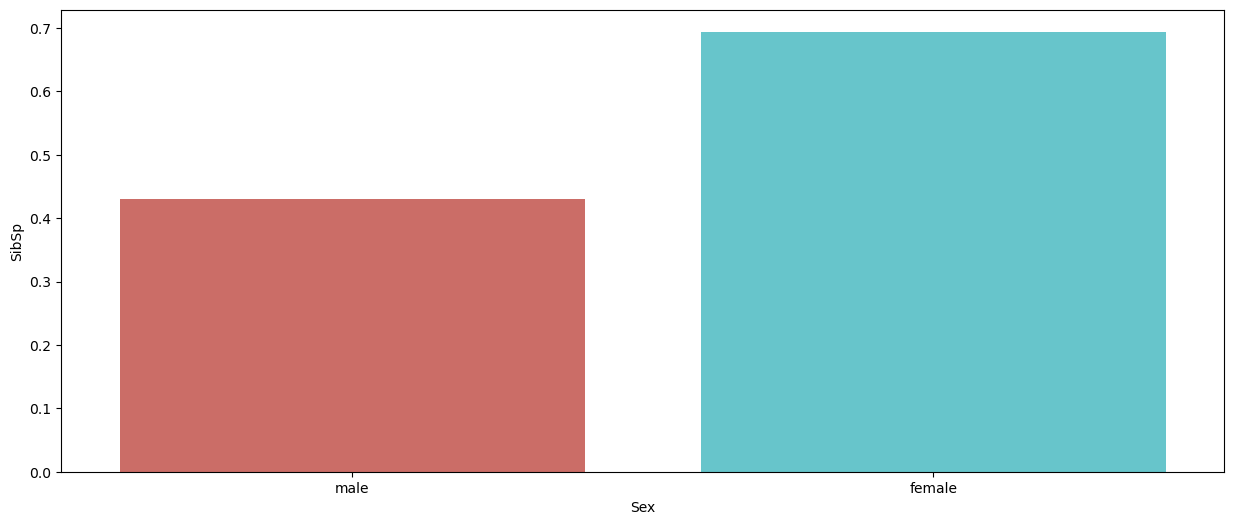

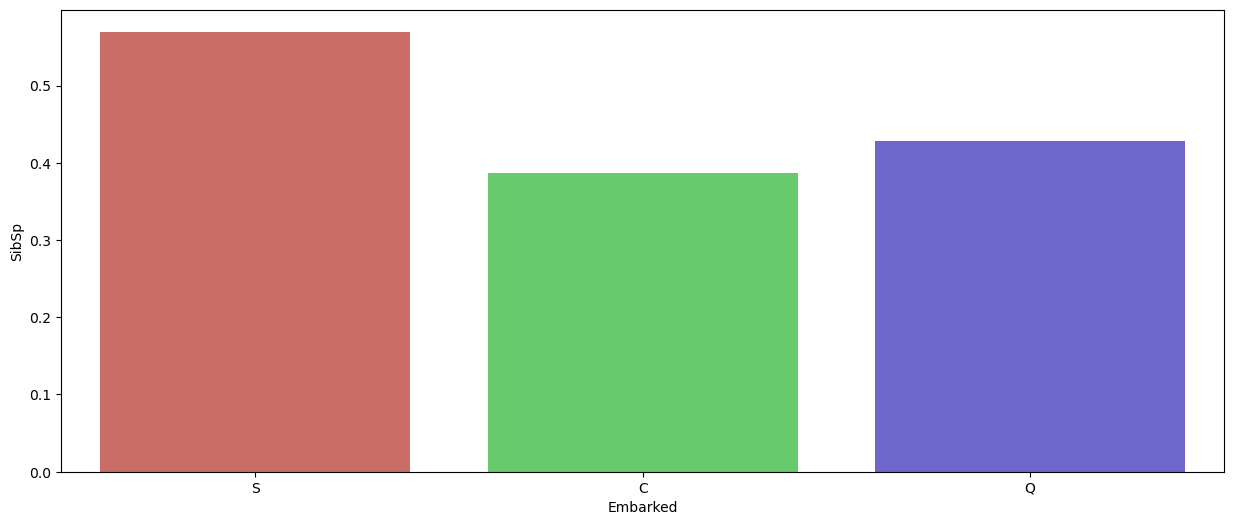

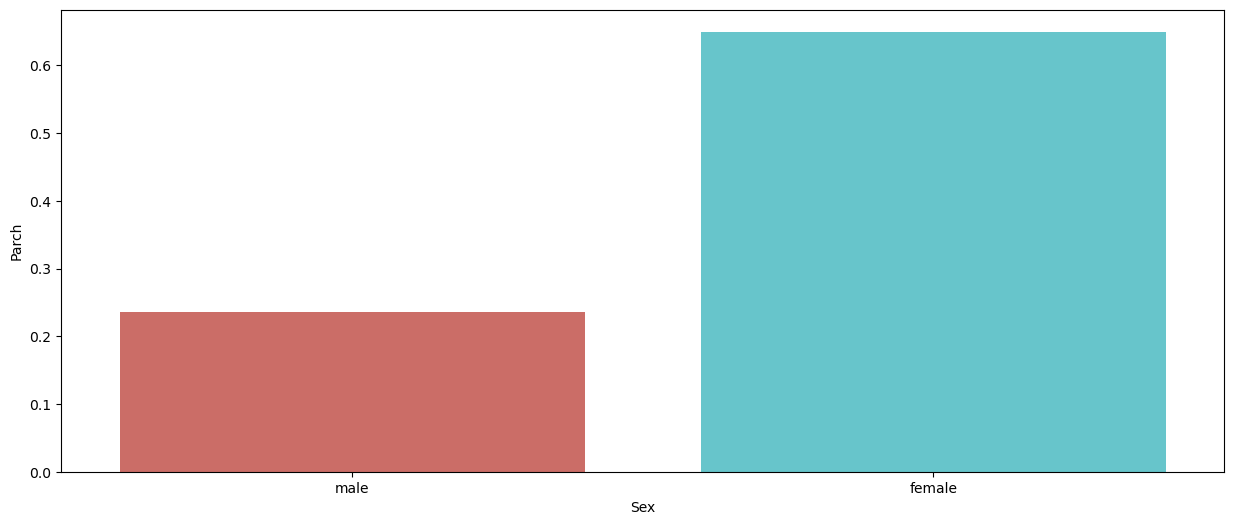

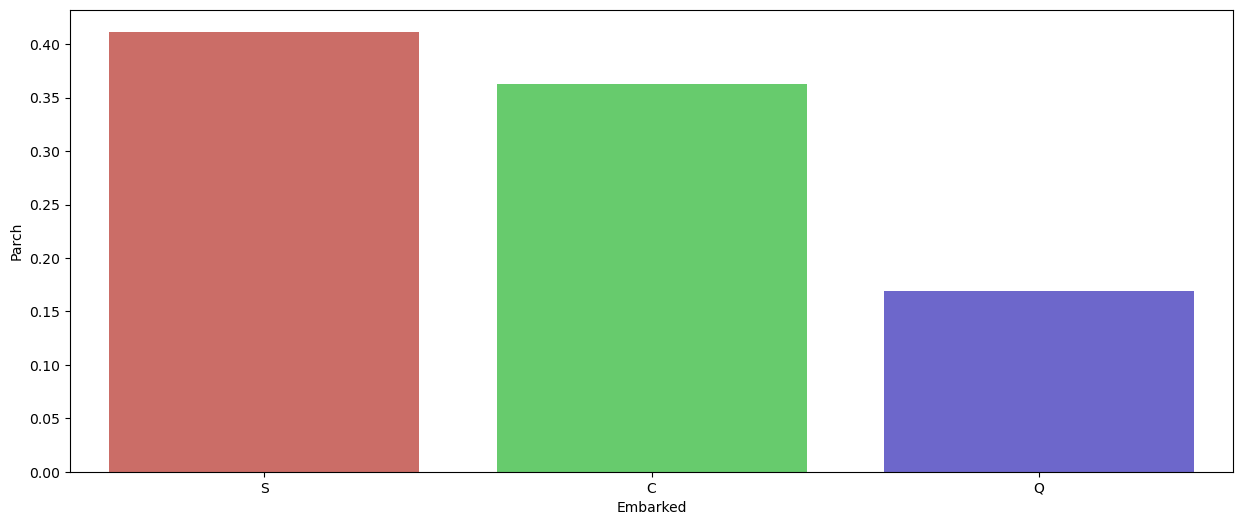

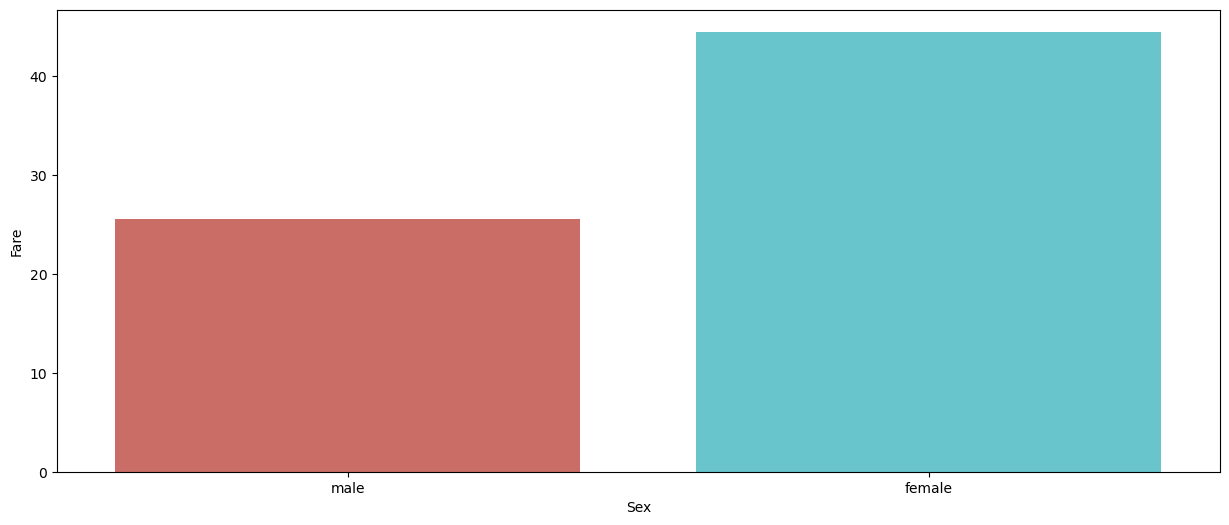

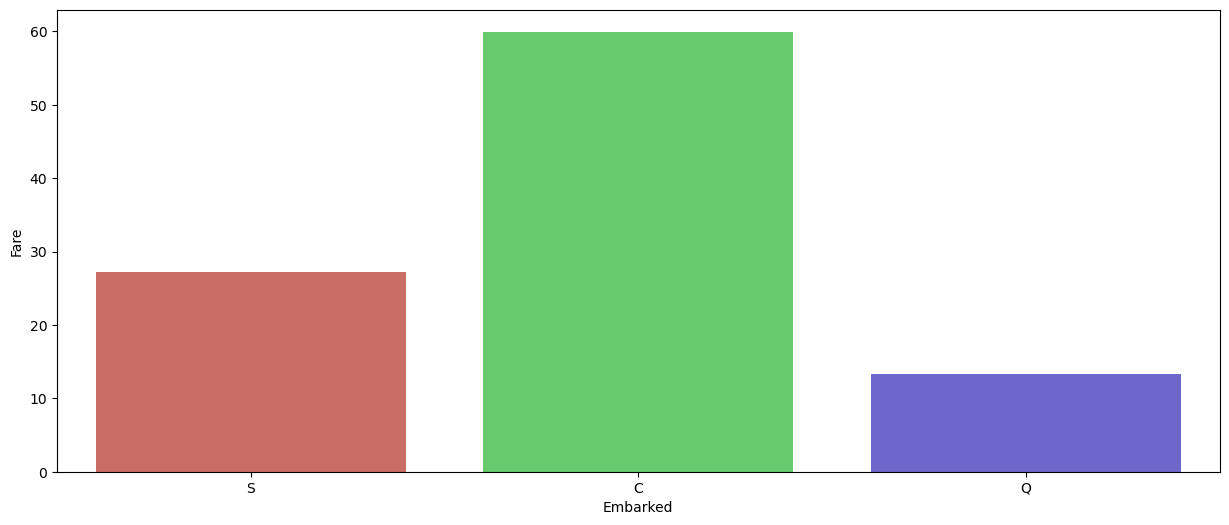

In [32]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x = df[j],y = df[i],data= df,ci = None,palette ='hls')
        plt.show()

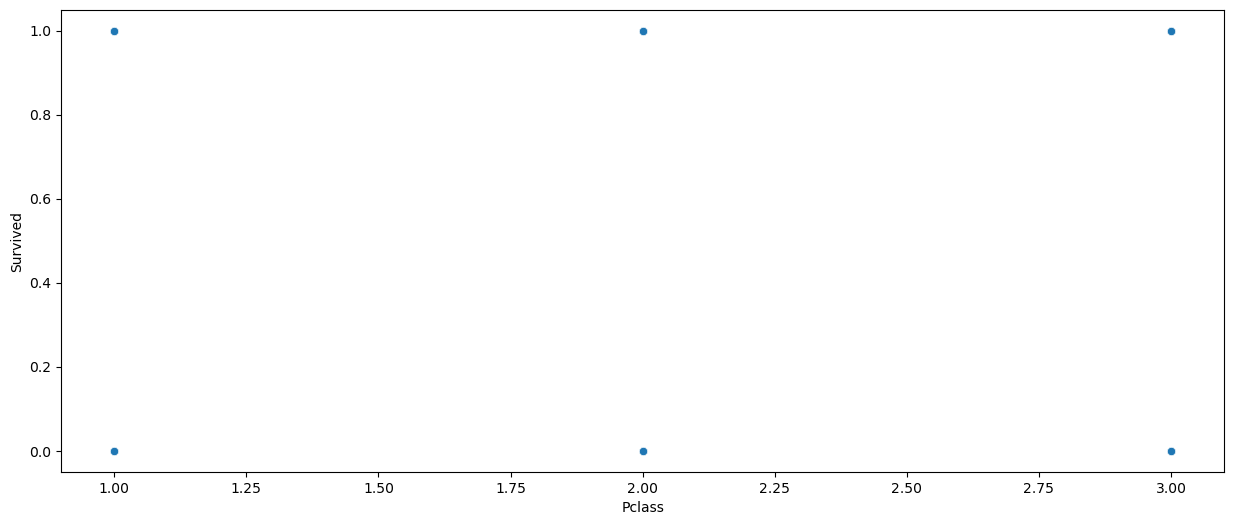

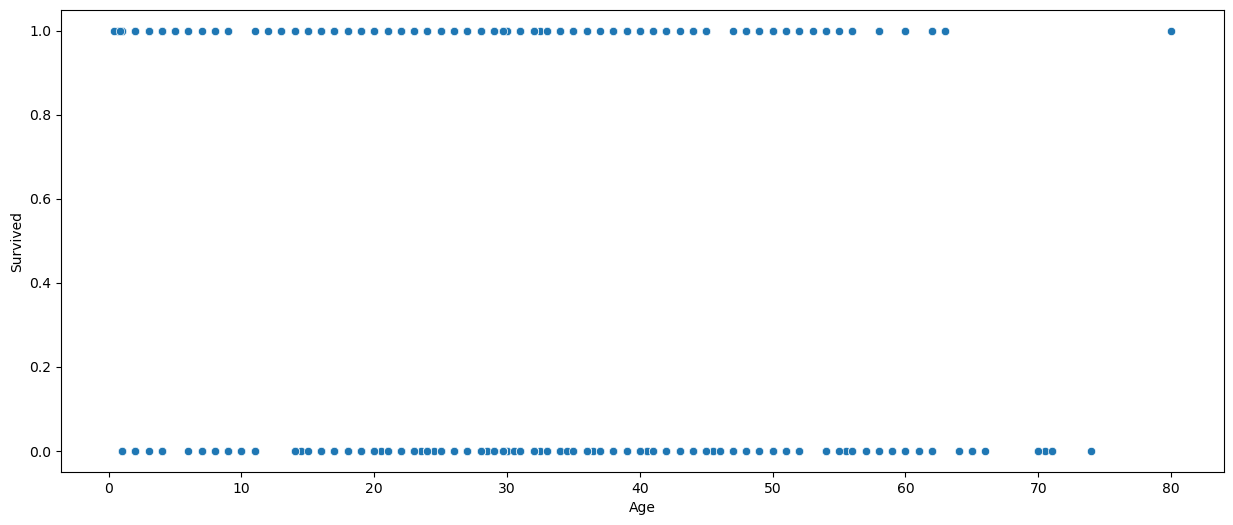

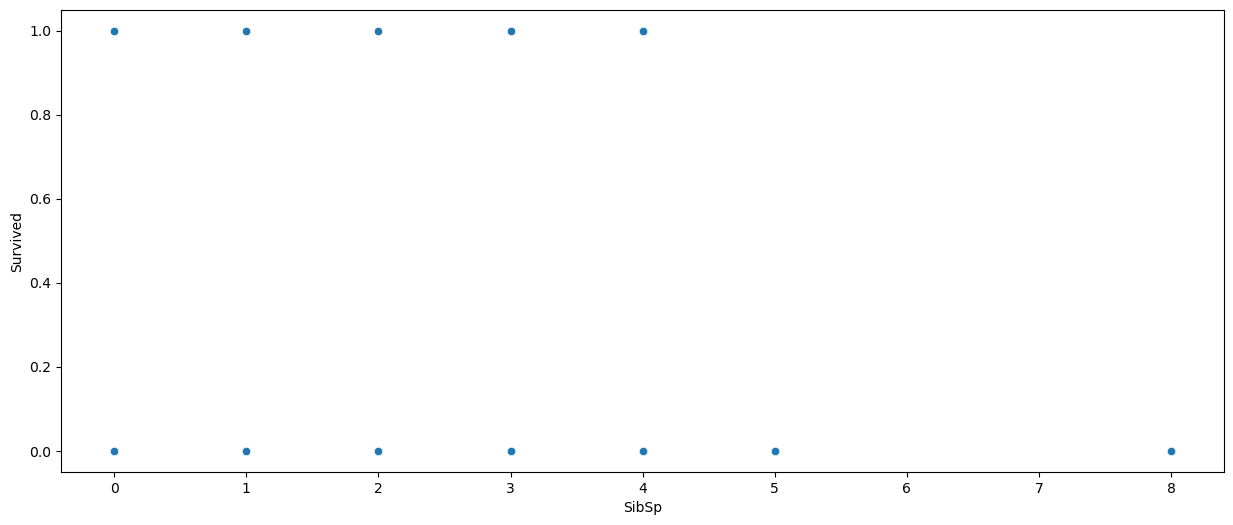

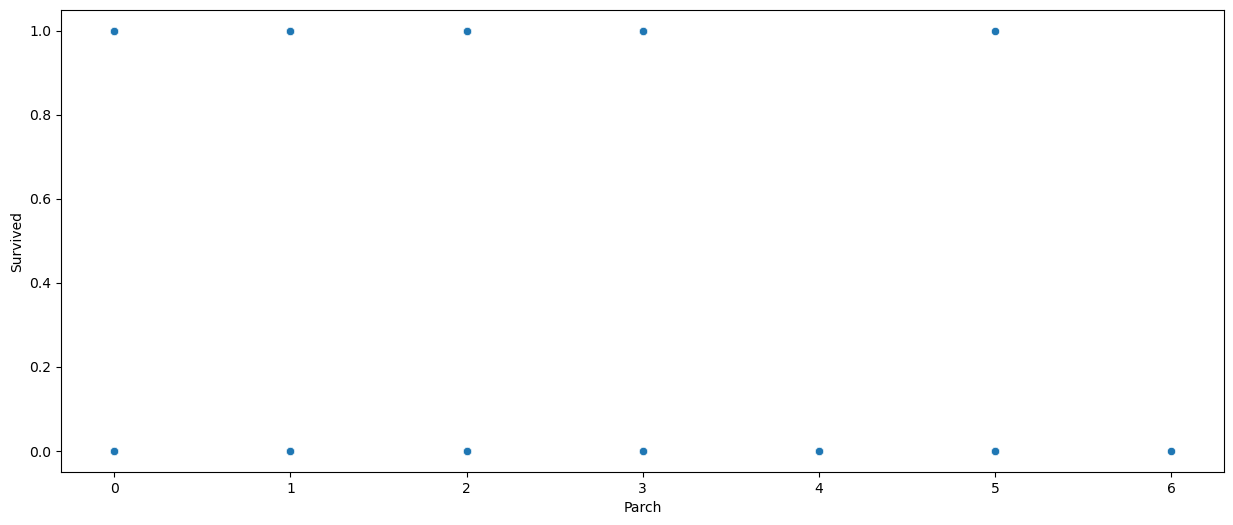

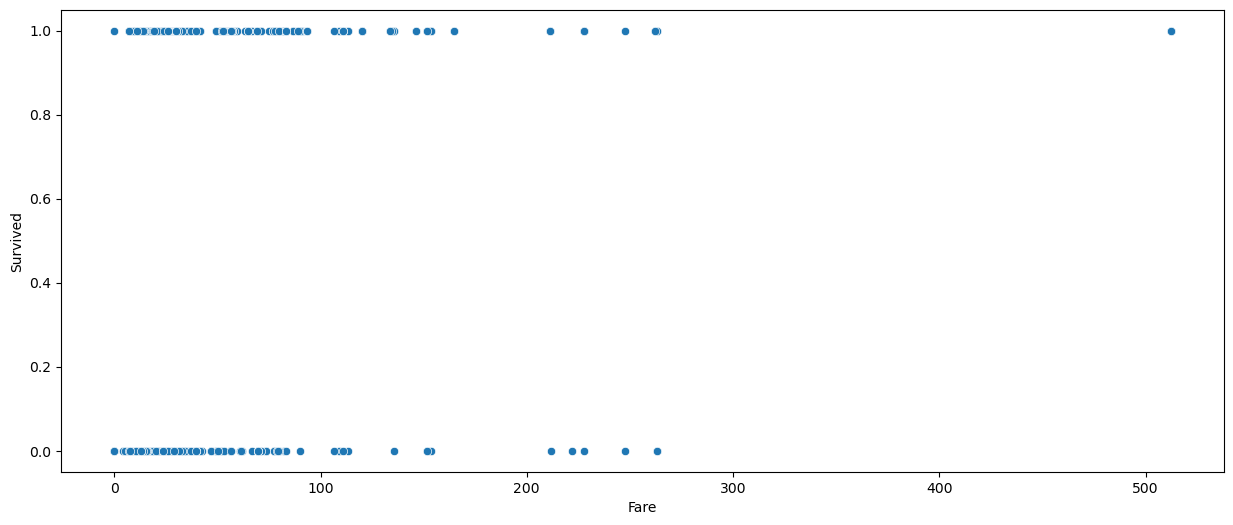

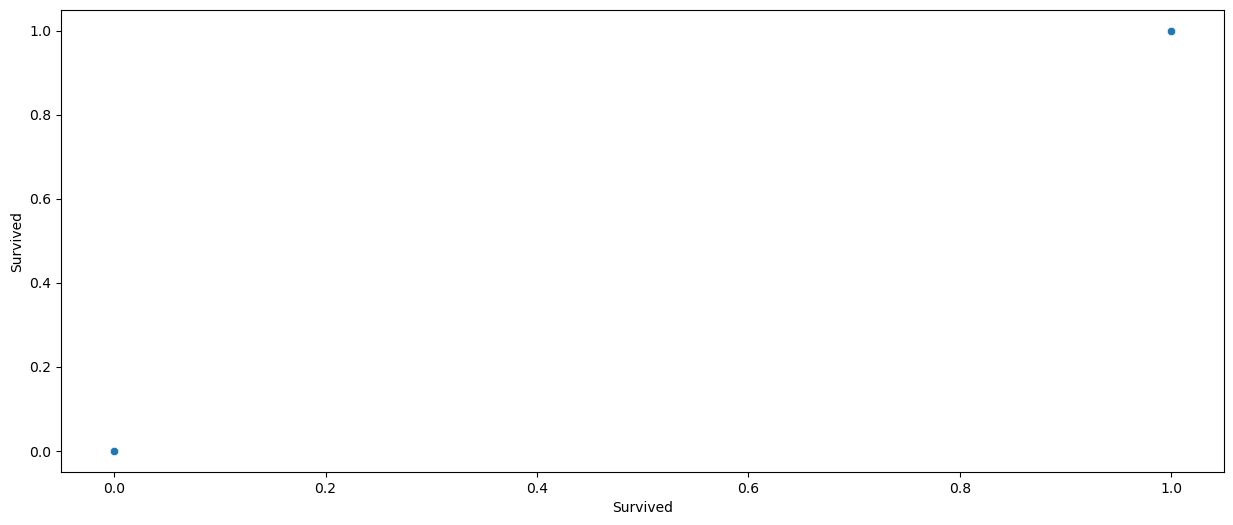

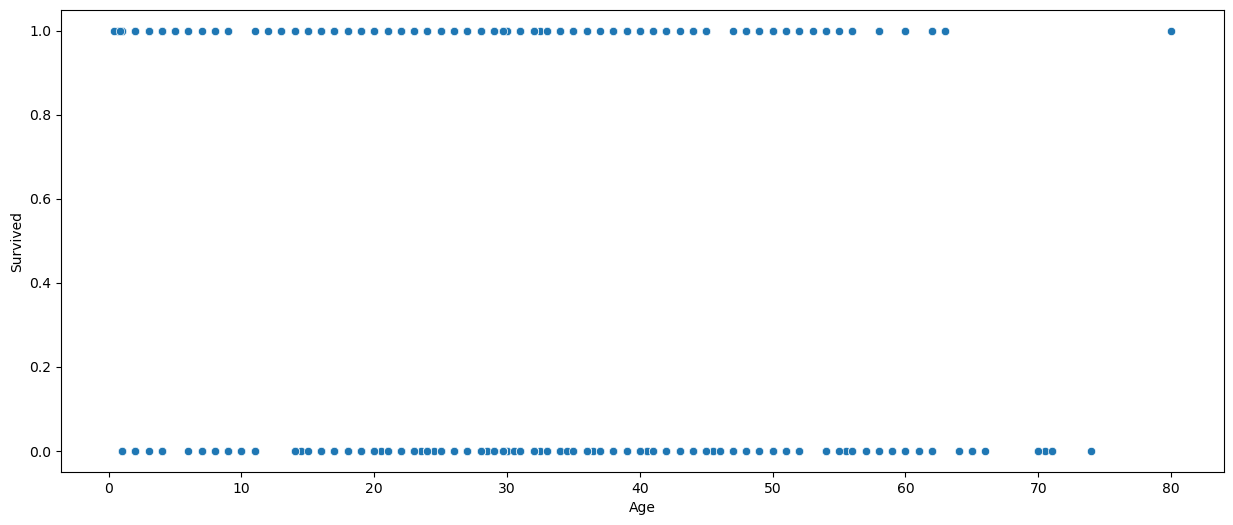

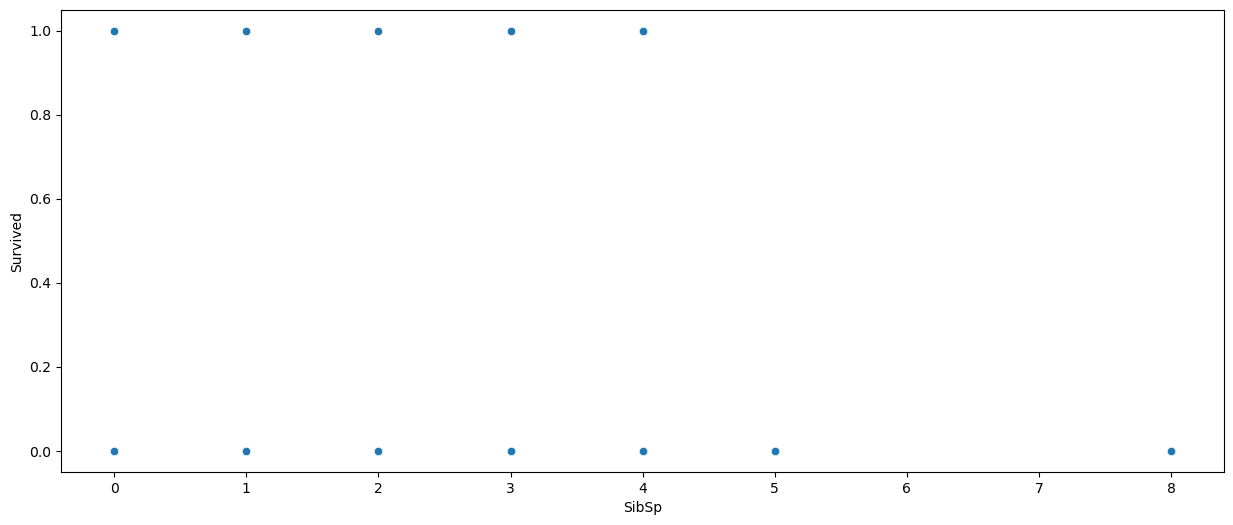

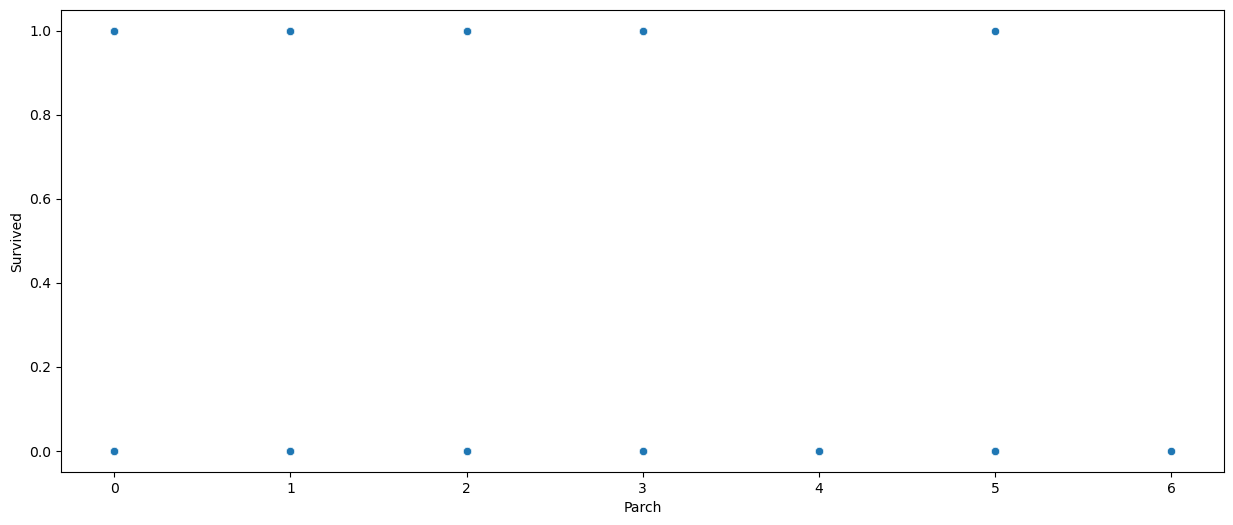

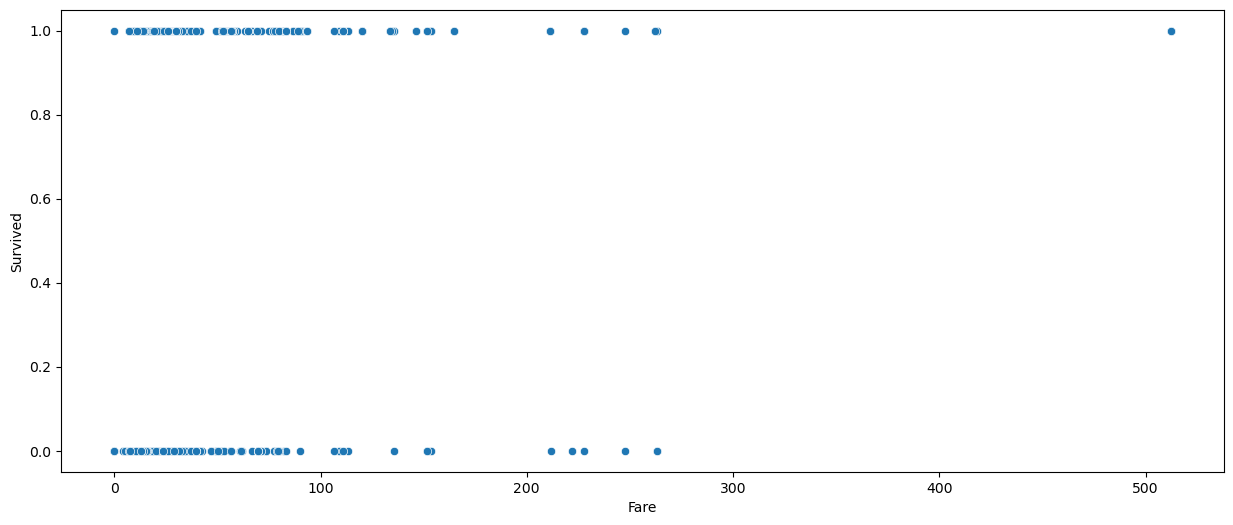

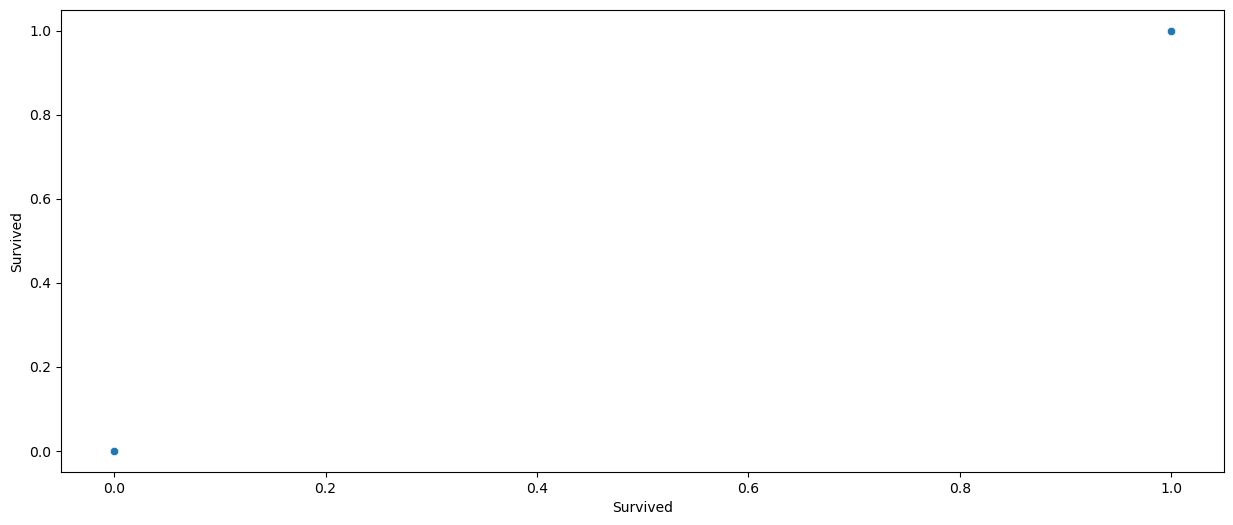

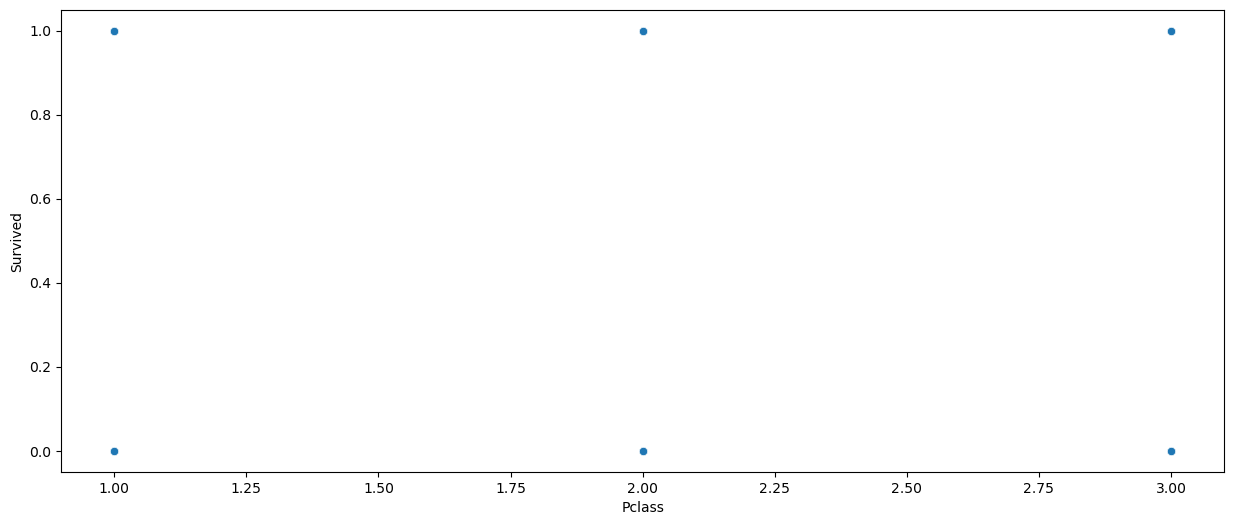

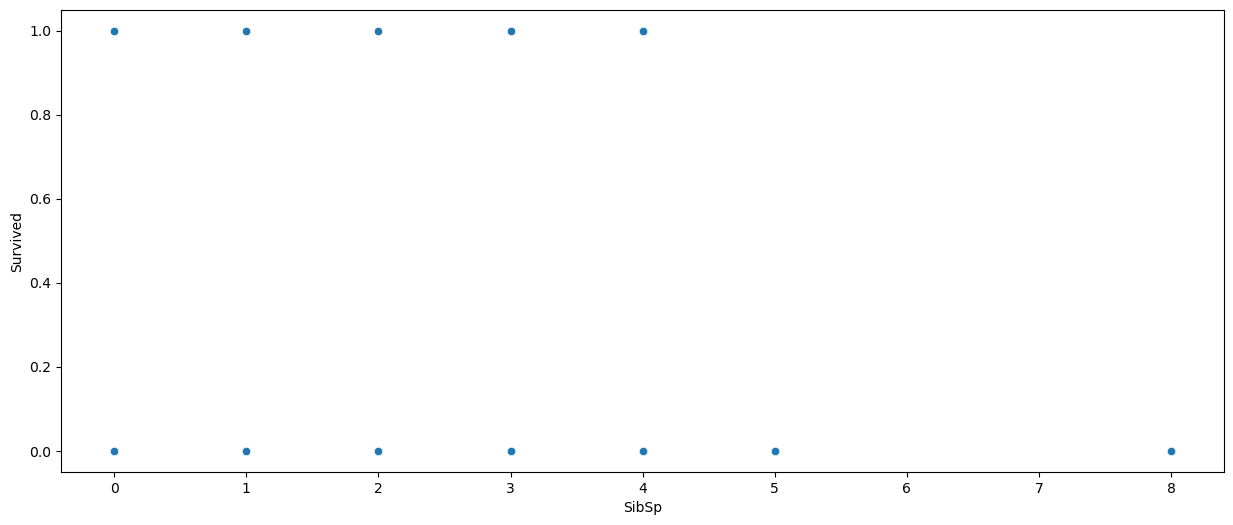

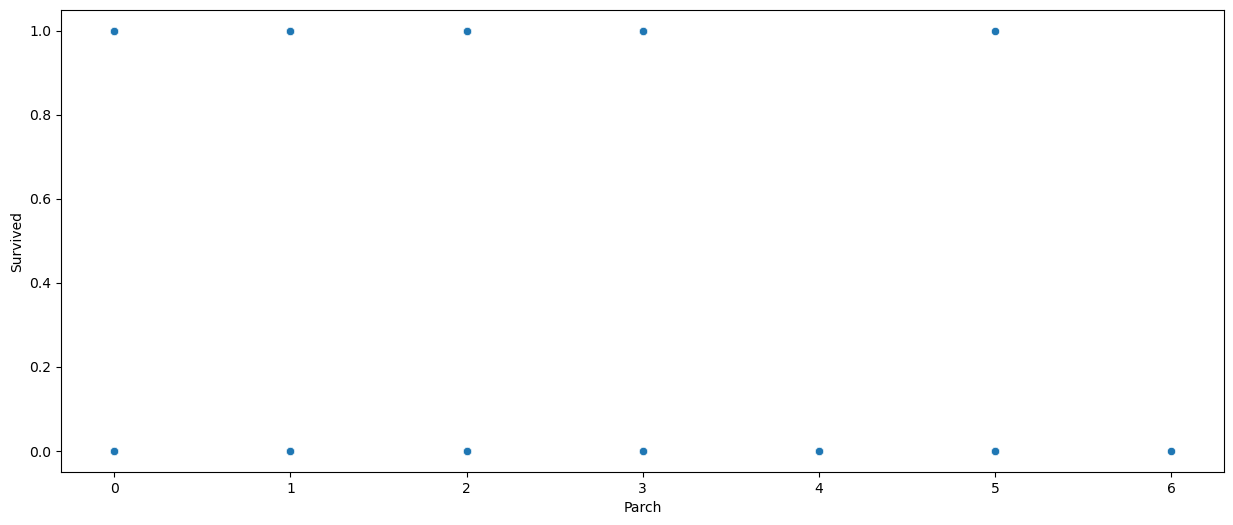

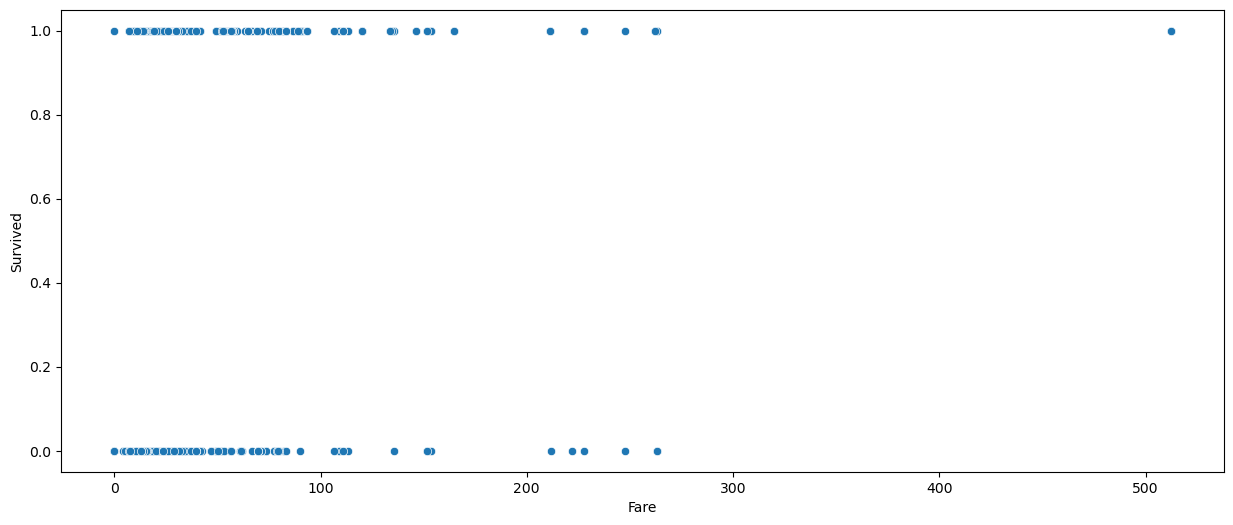

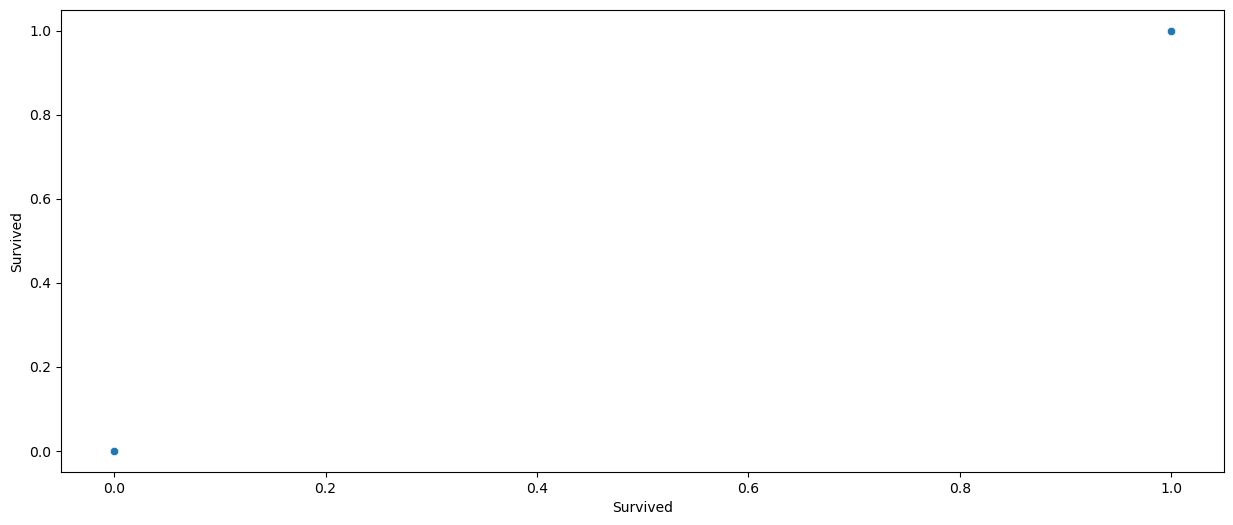

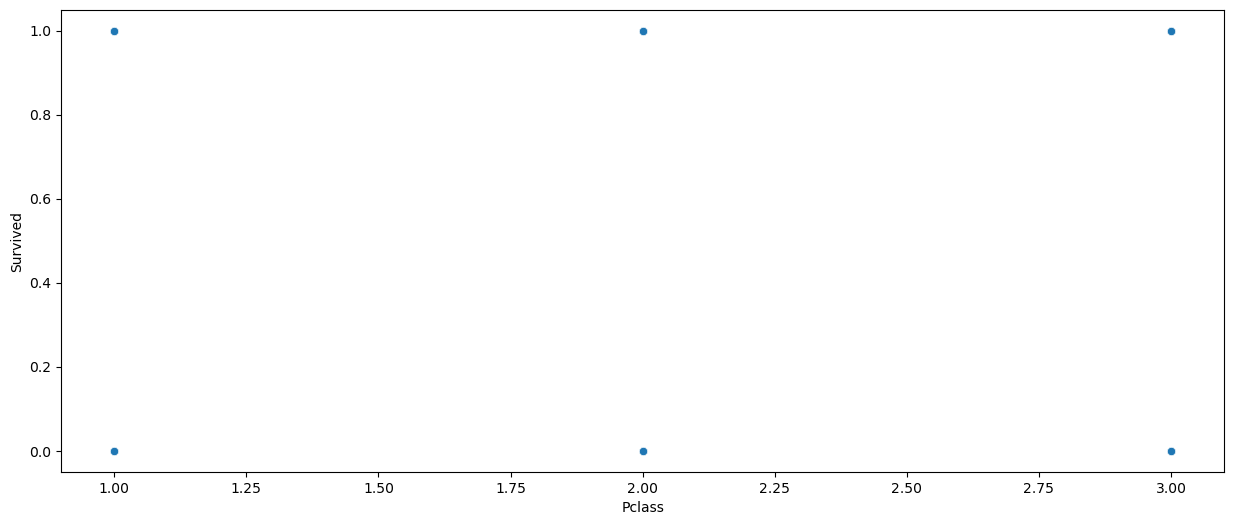

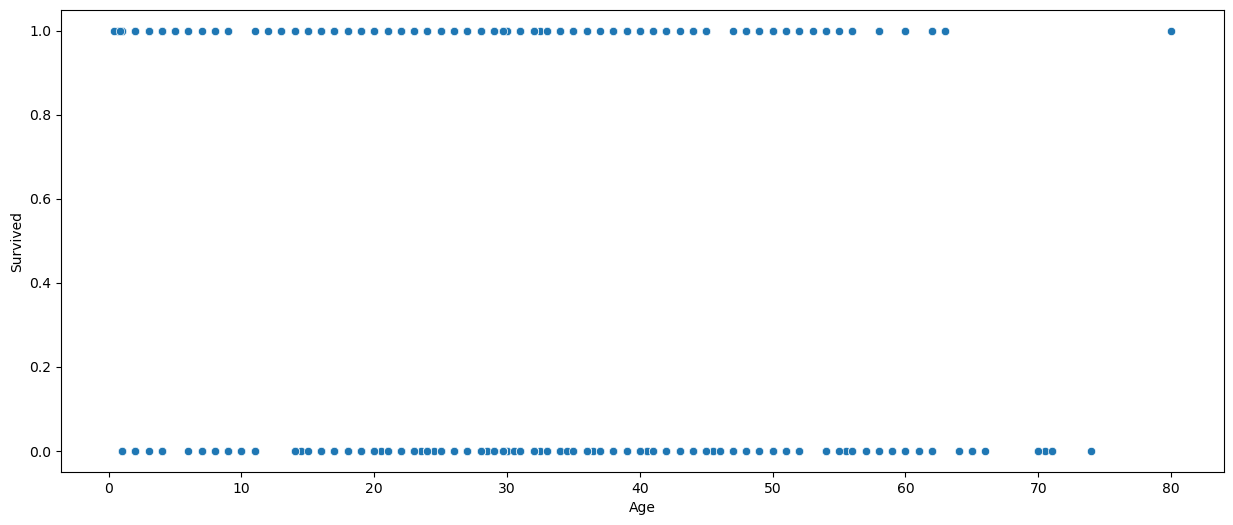

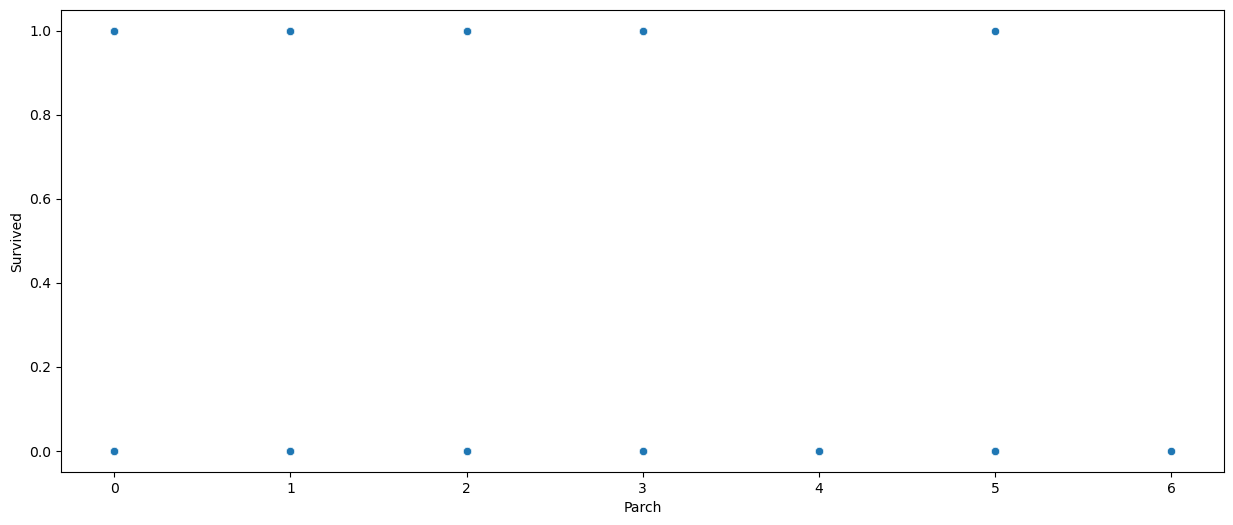

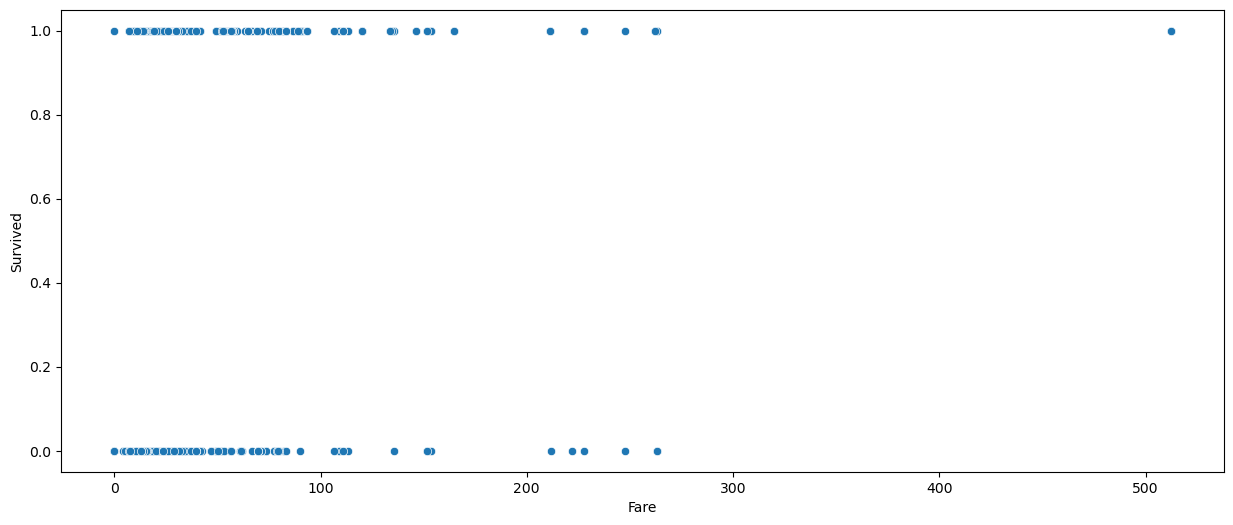

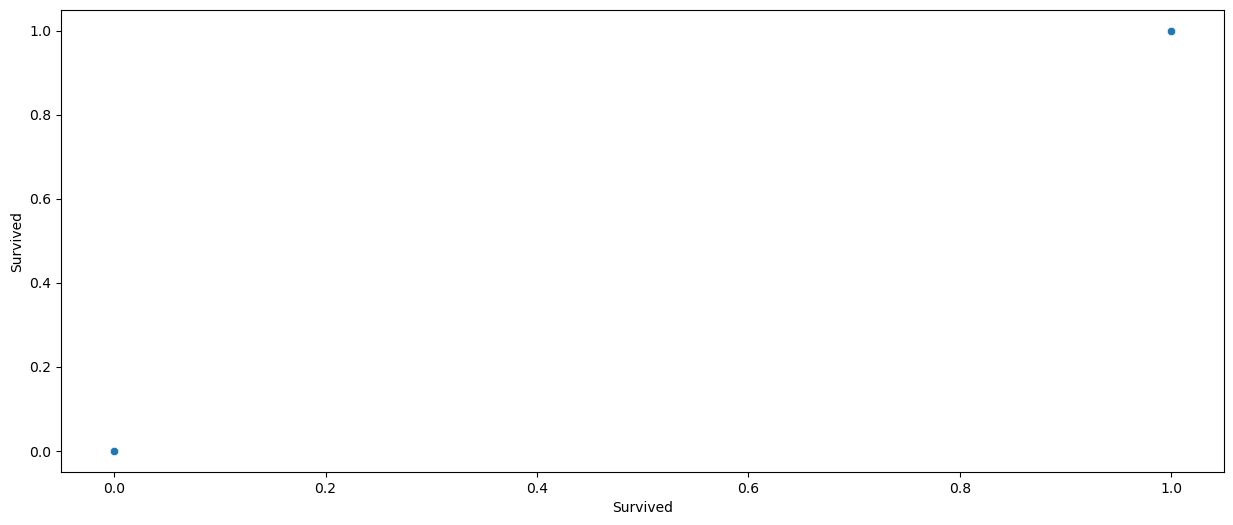

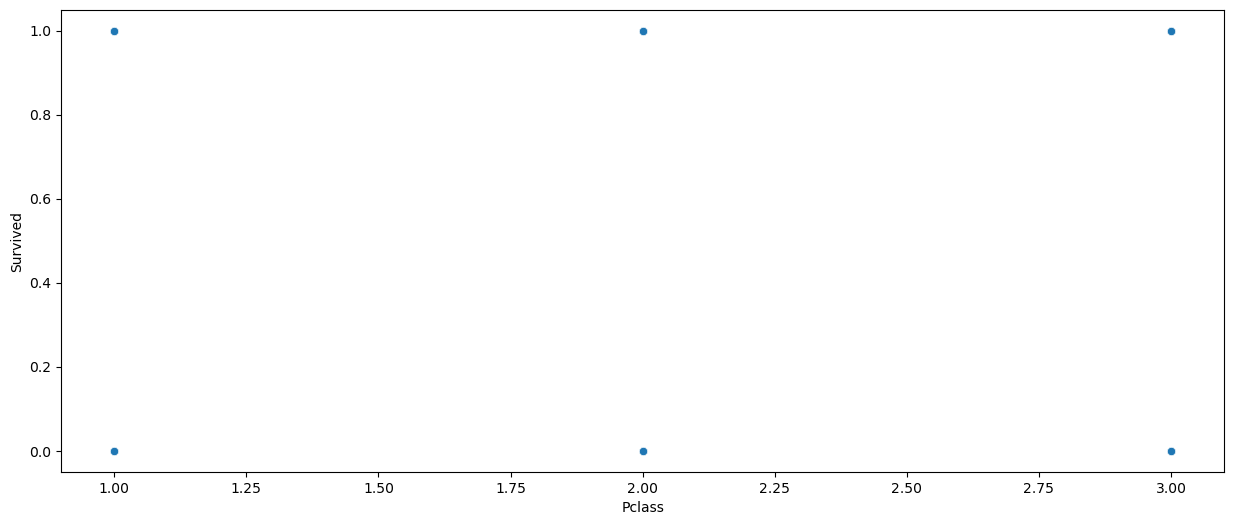

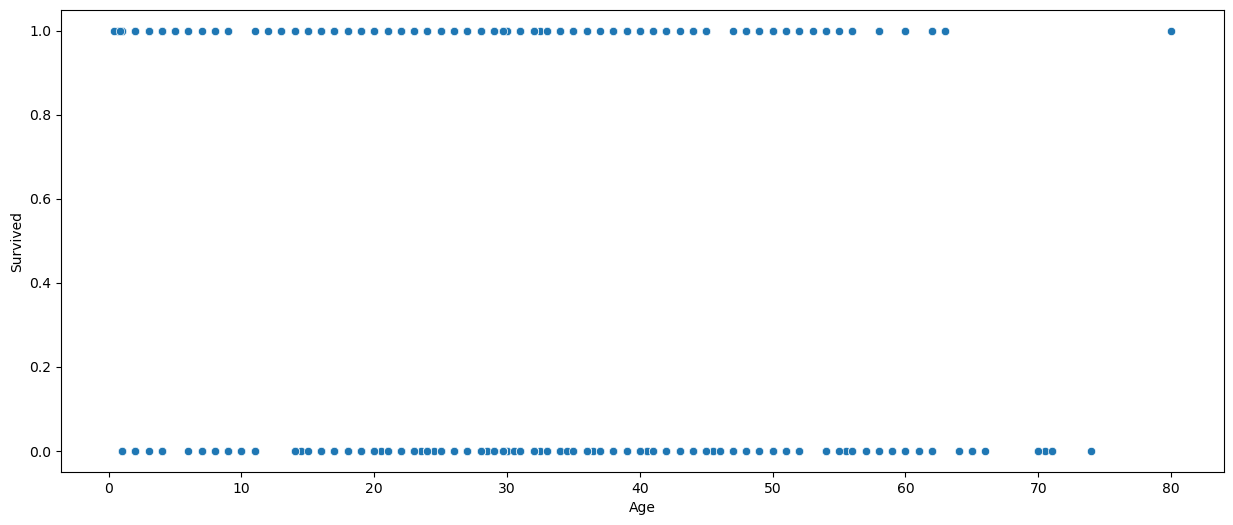

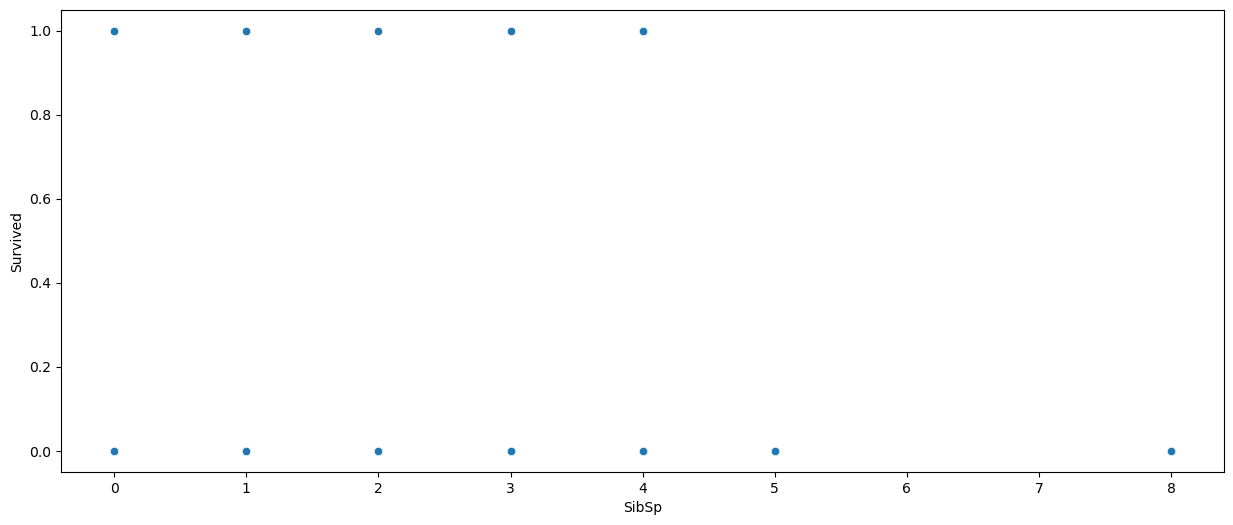

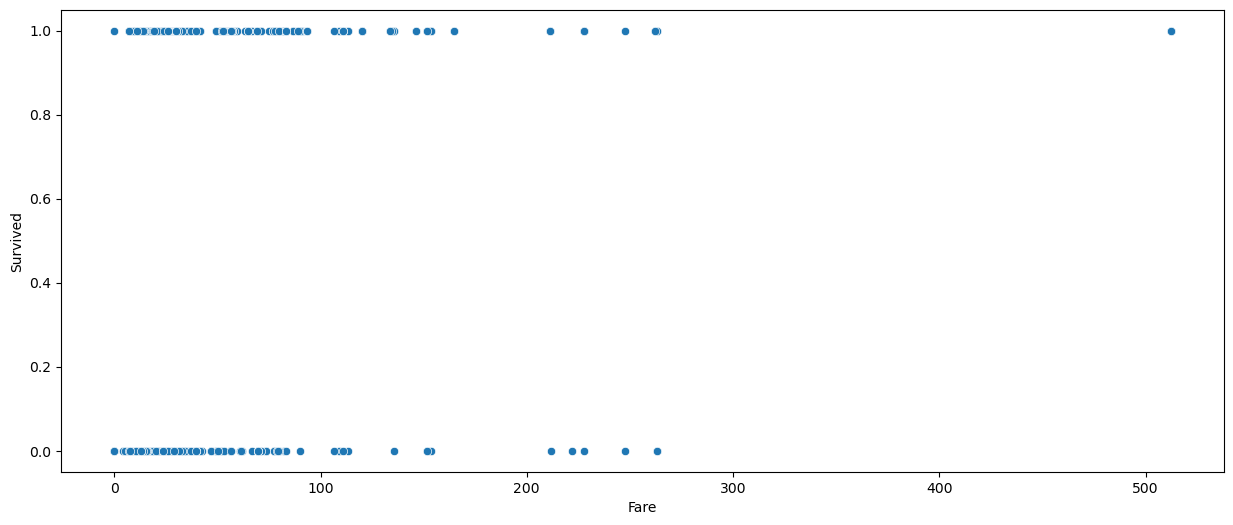

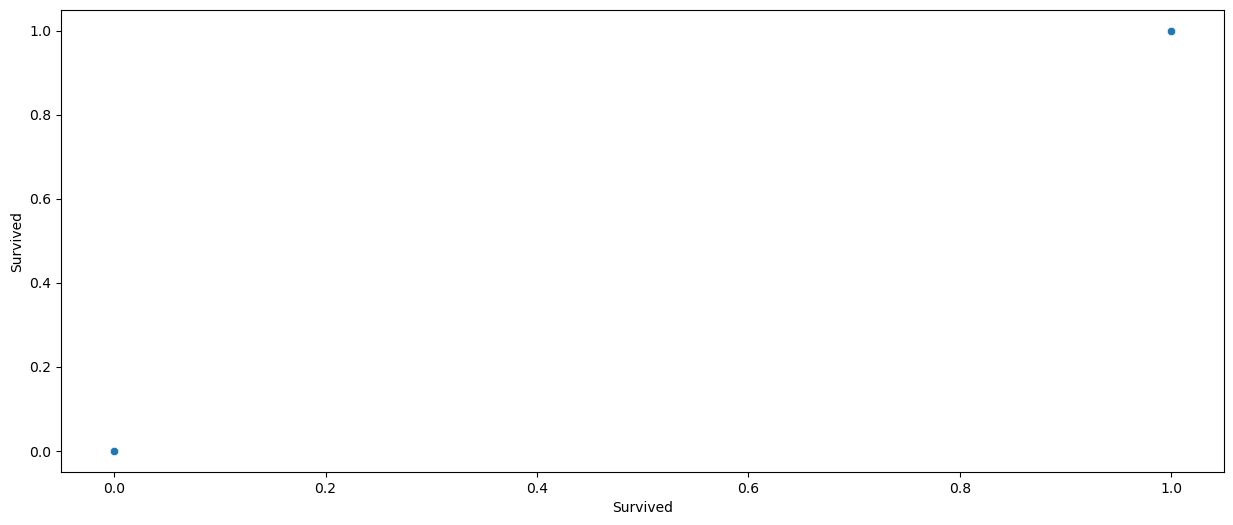

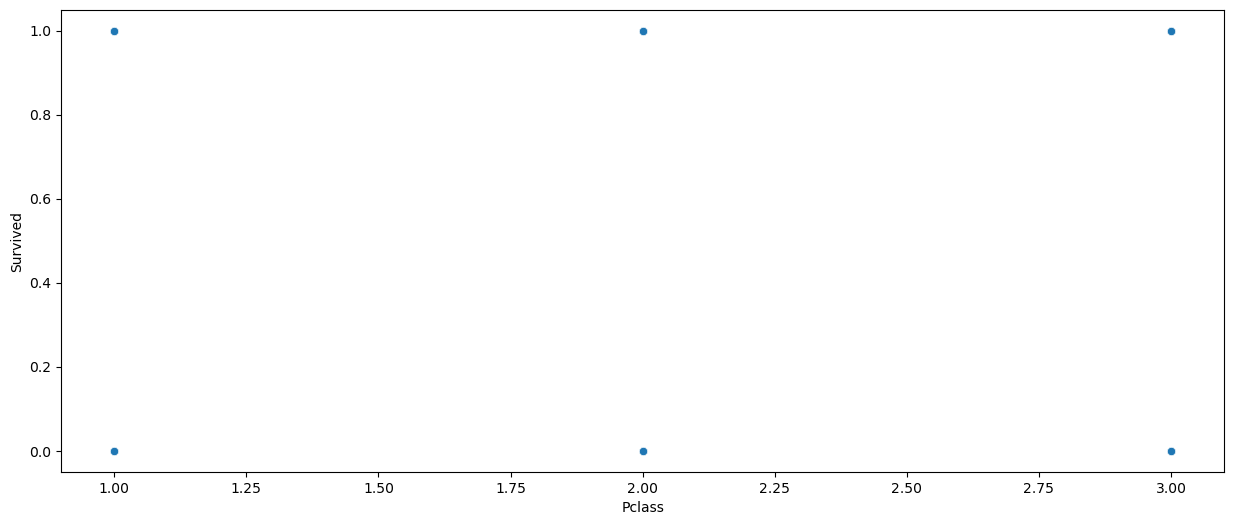

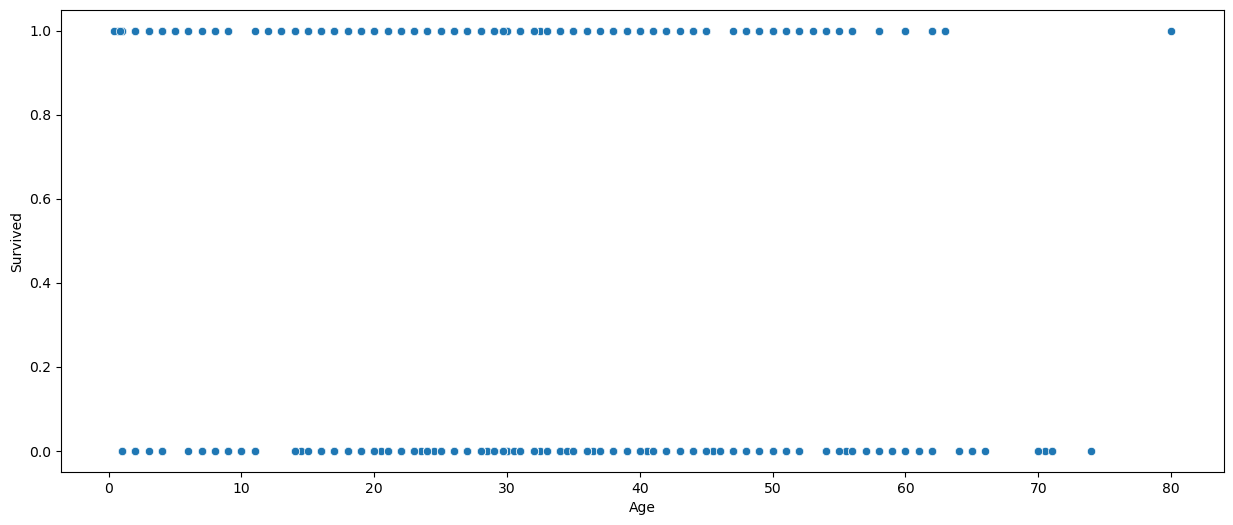

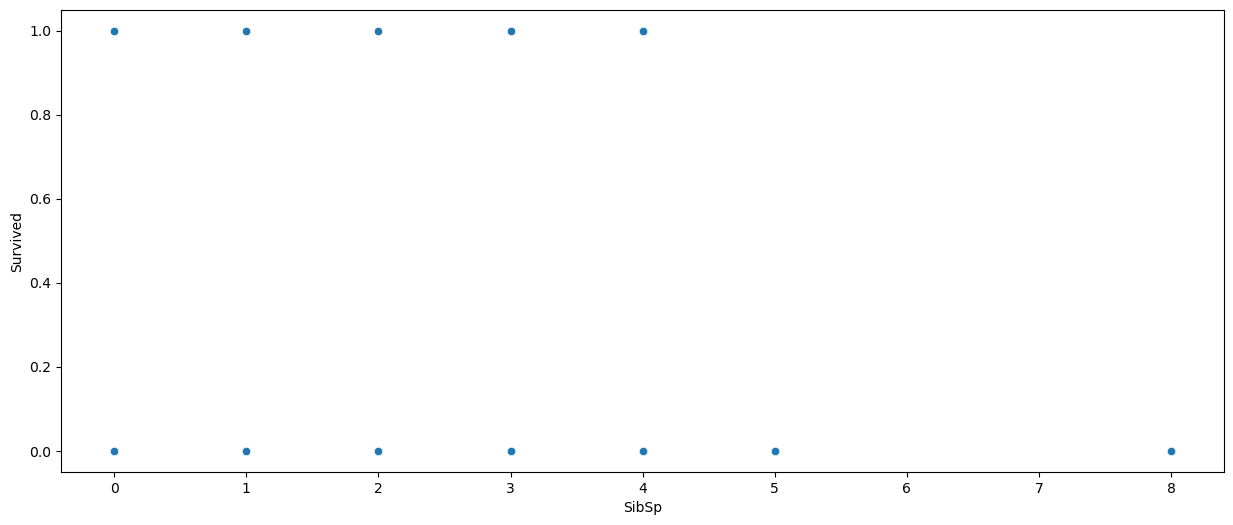

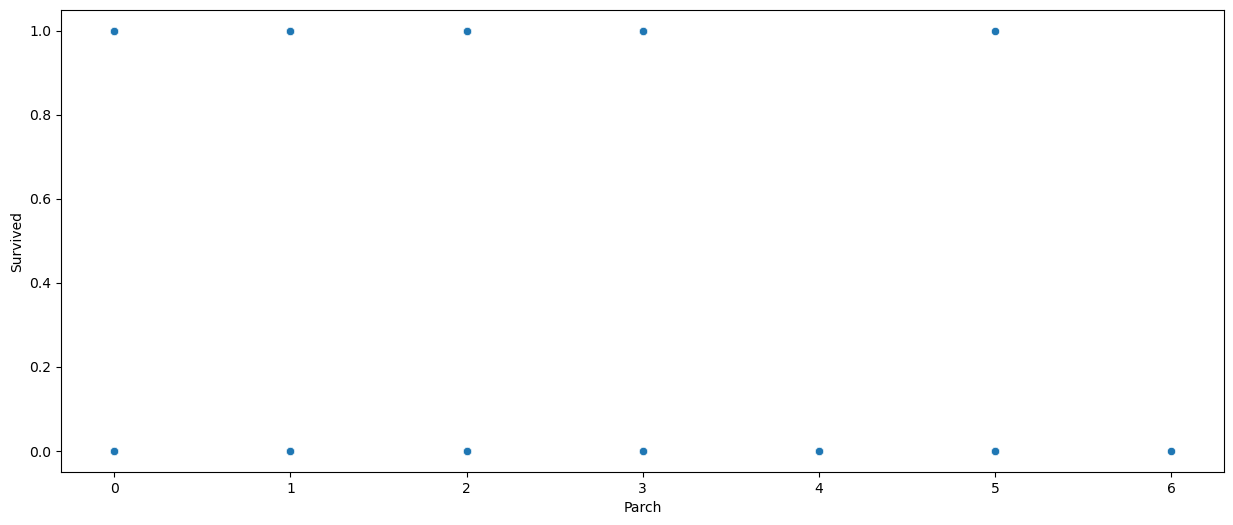

In [33]:
for i in numerical_columns:
    for j in numerical_columns:
        if i!= j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[j],y = df['Survived'],data = df,palette ='hls')
            plt.show()

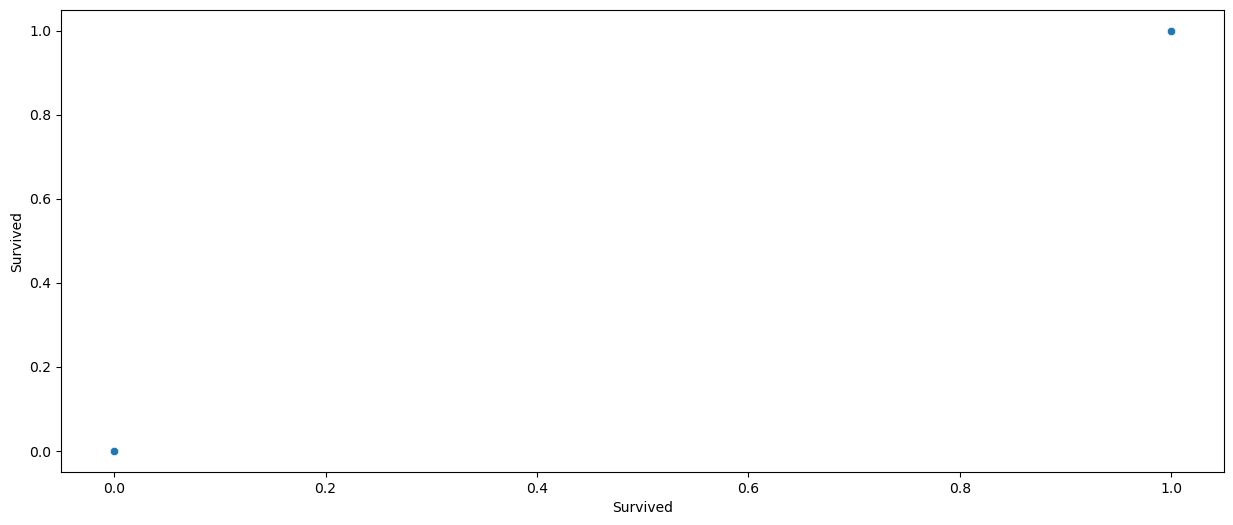

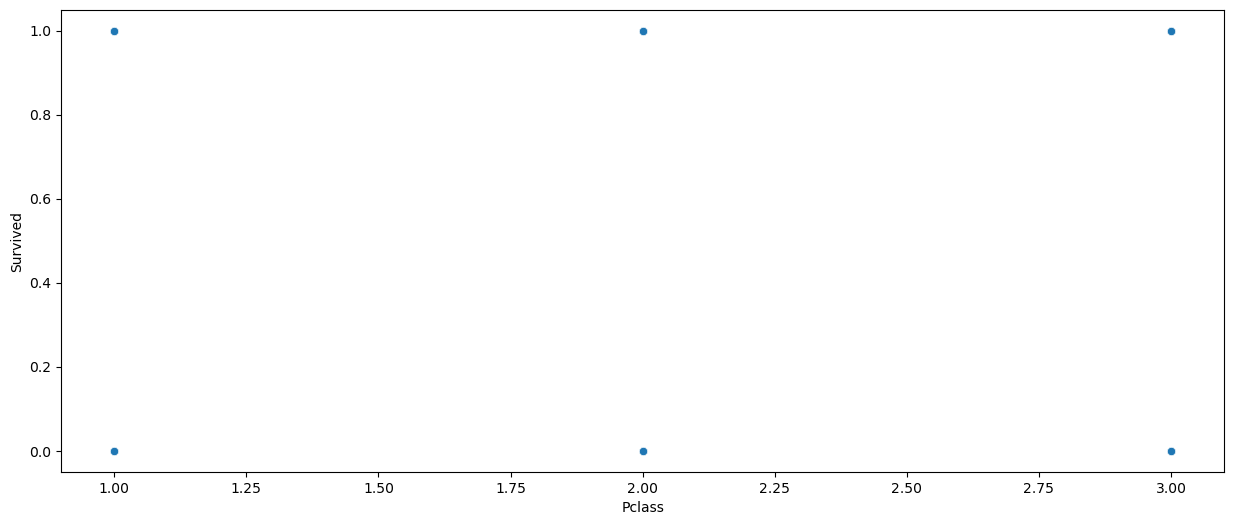

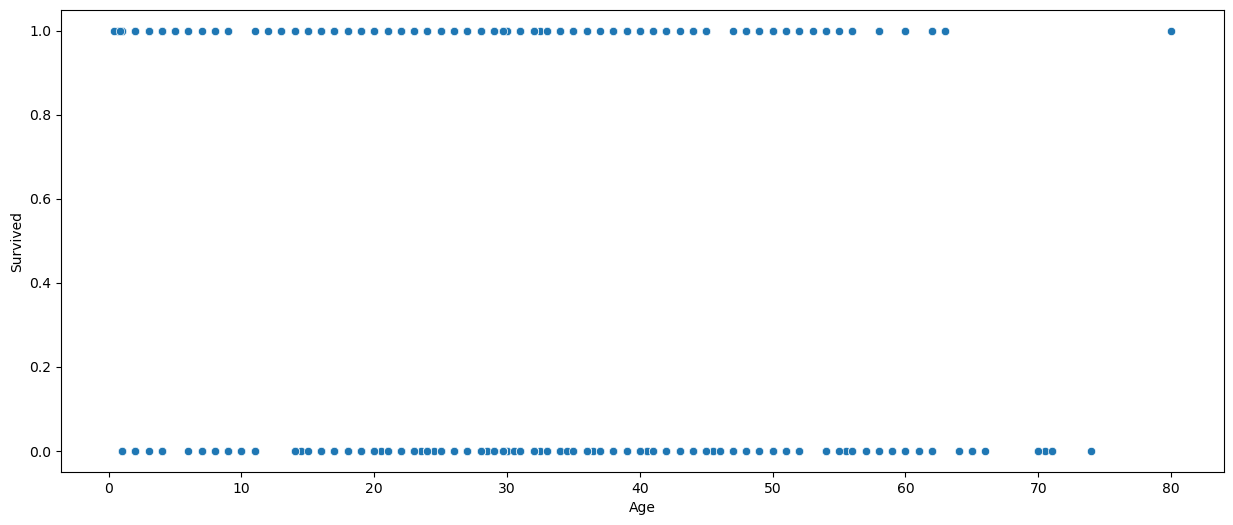

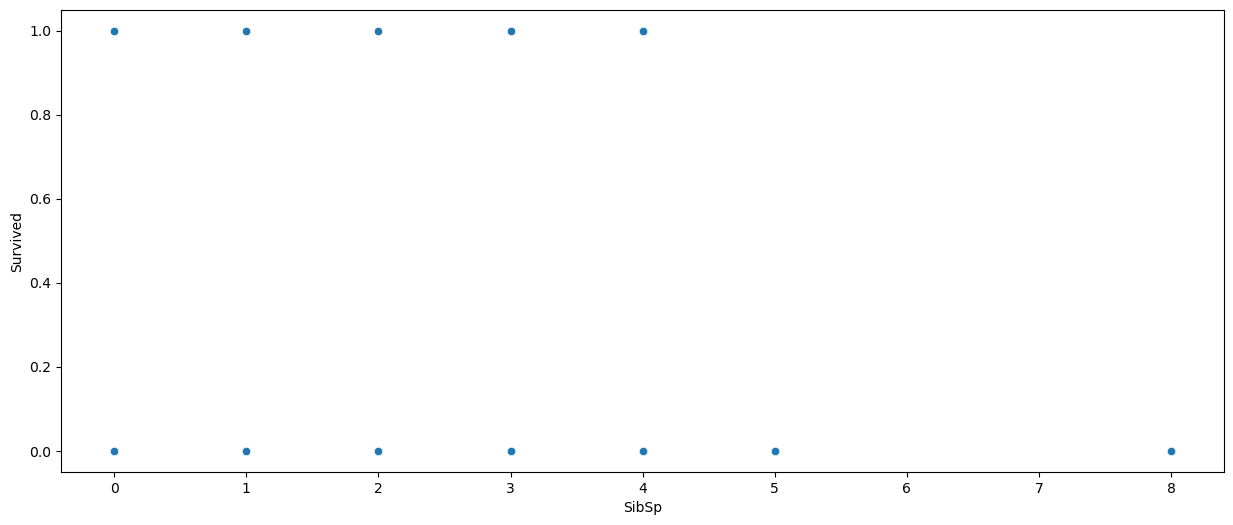

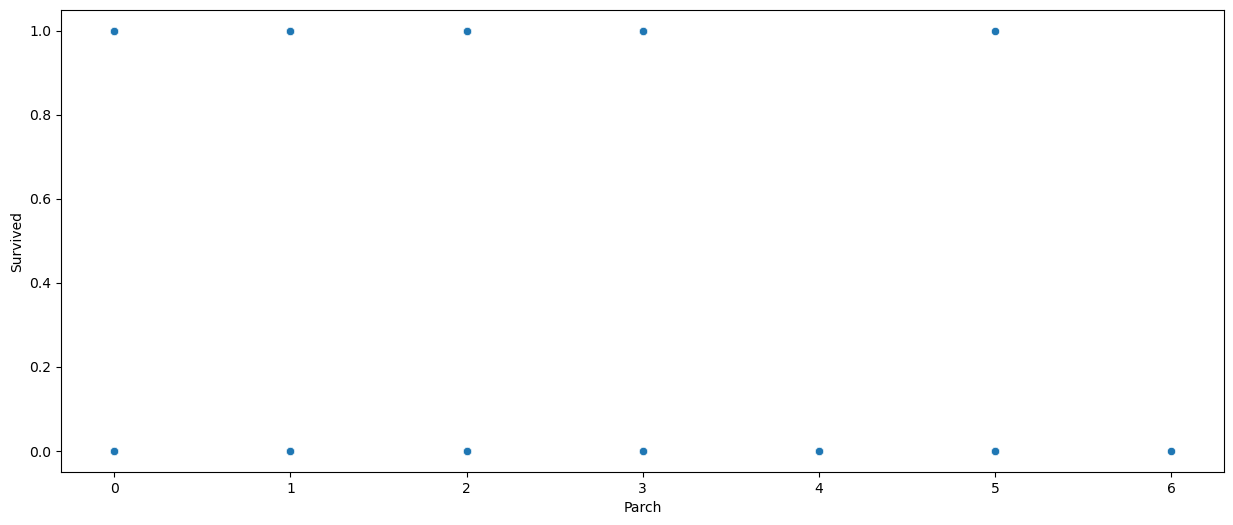

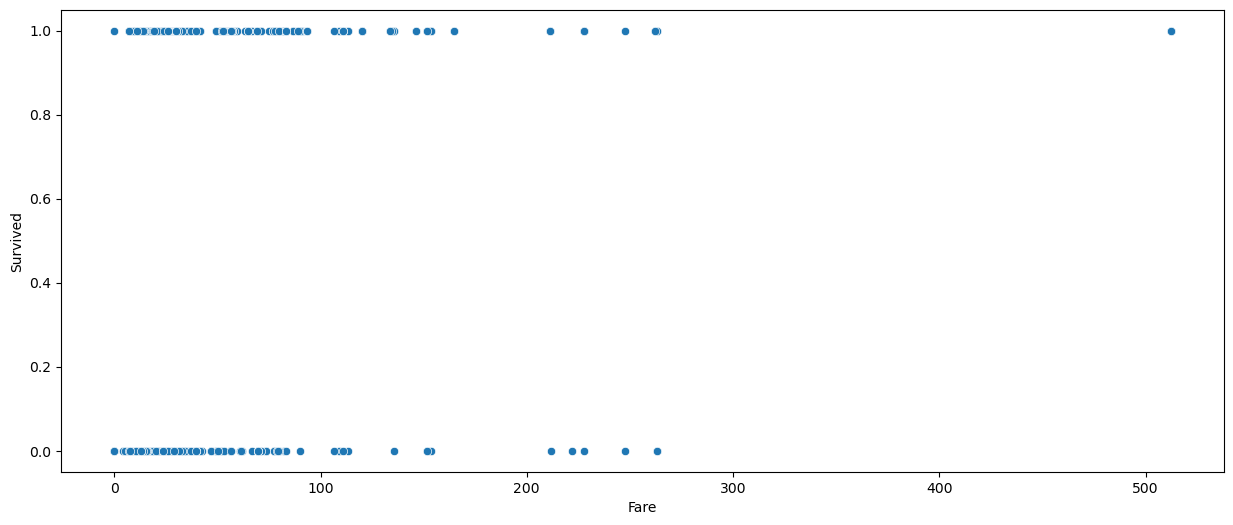

In [34]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.scatterplot(x = df[i],y = df['Survived'],data = df,palette ='hls')
    plt.show()

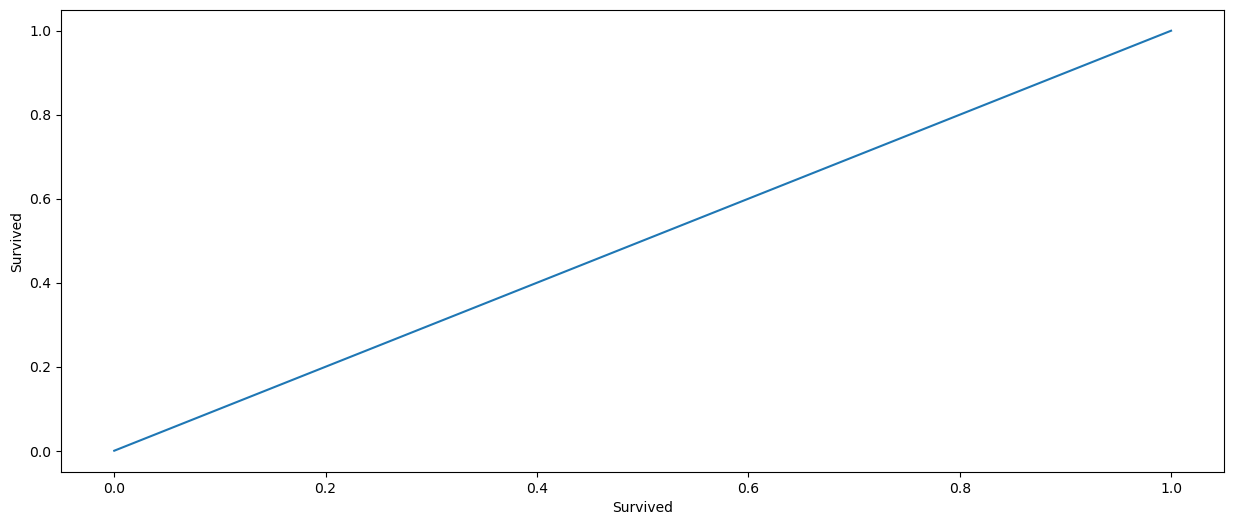

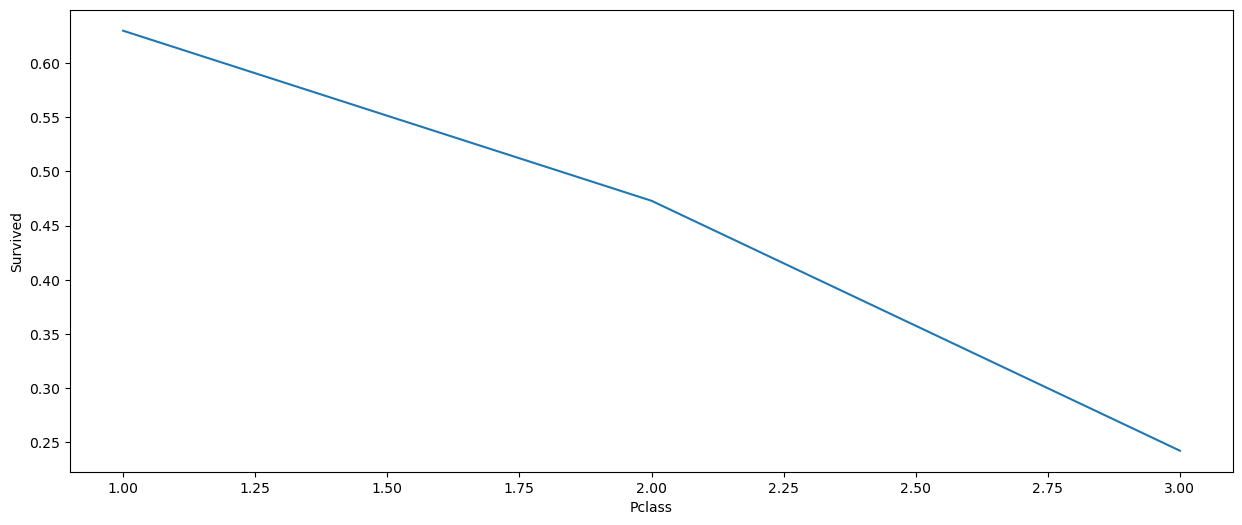

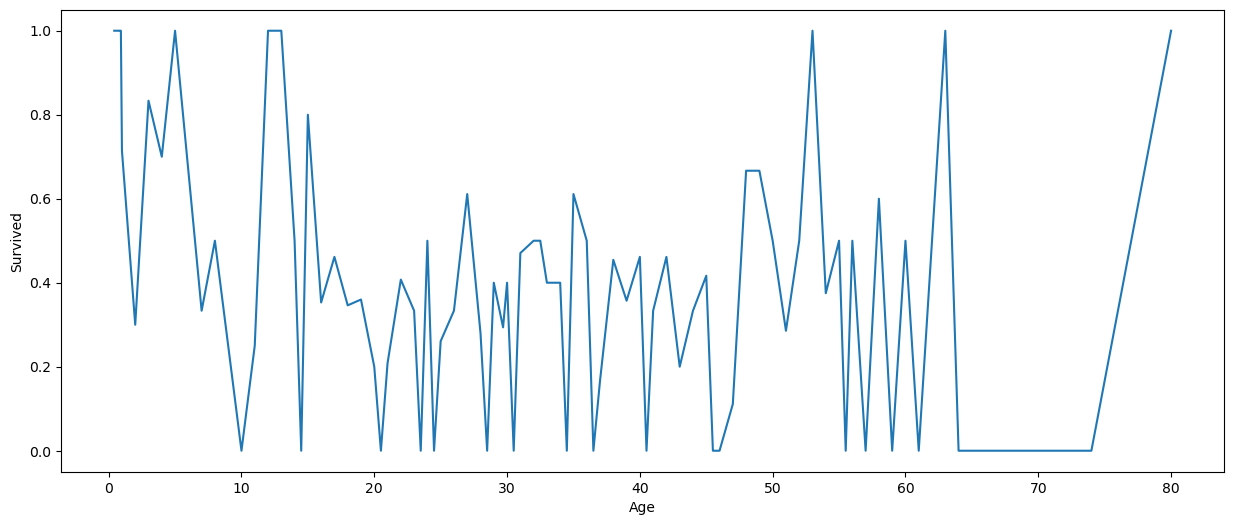

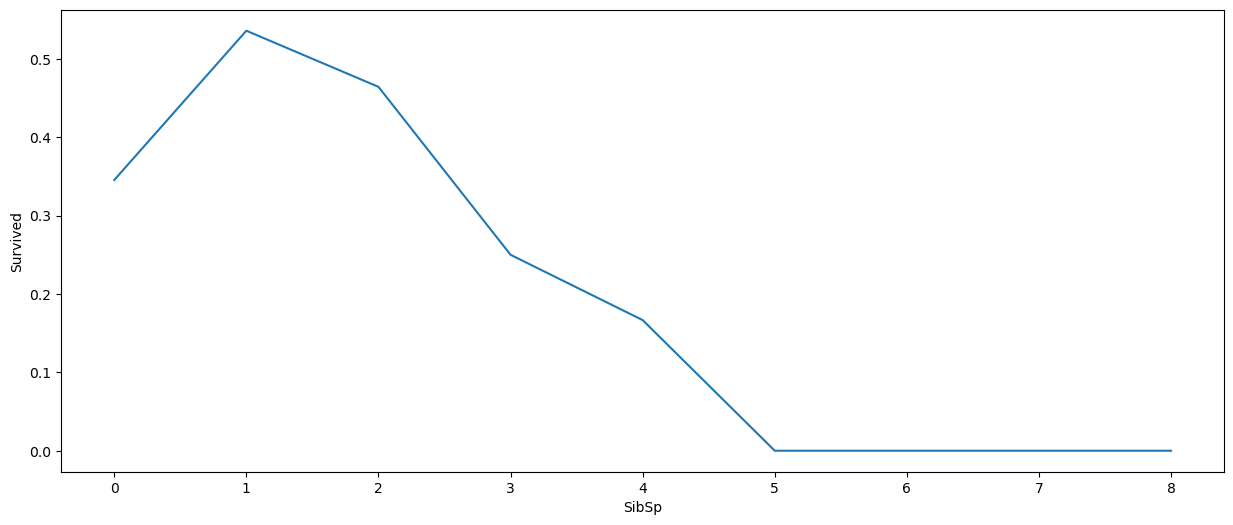

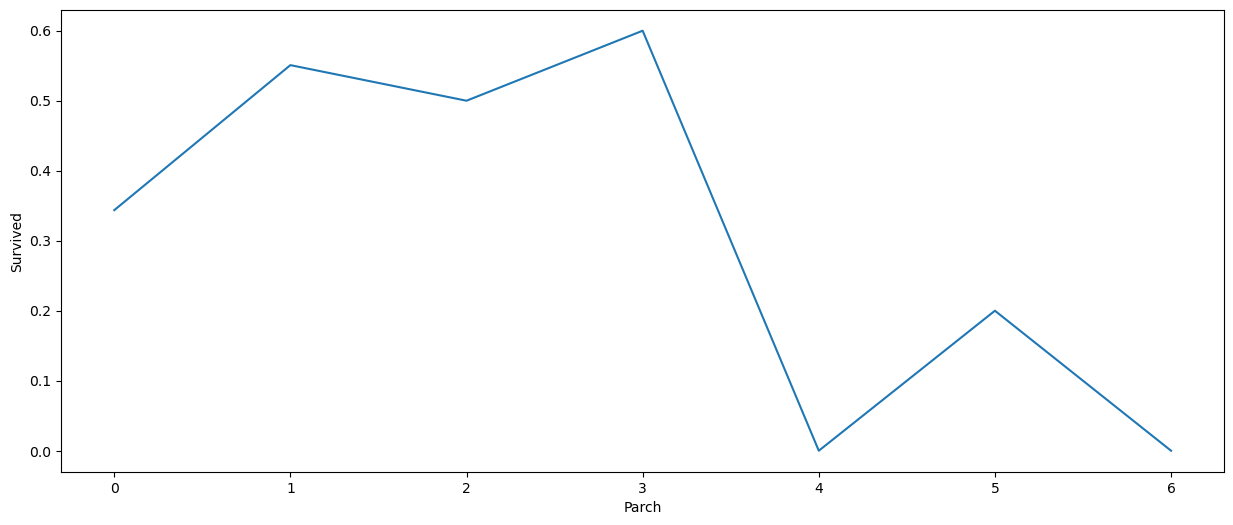

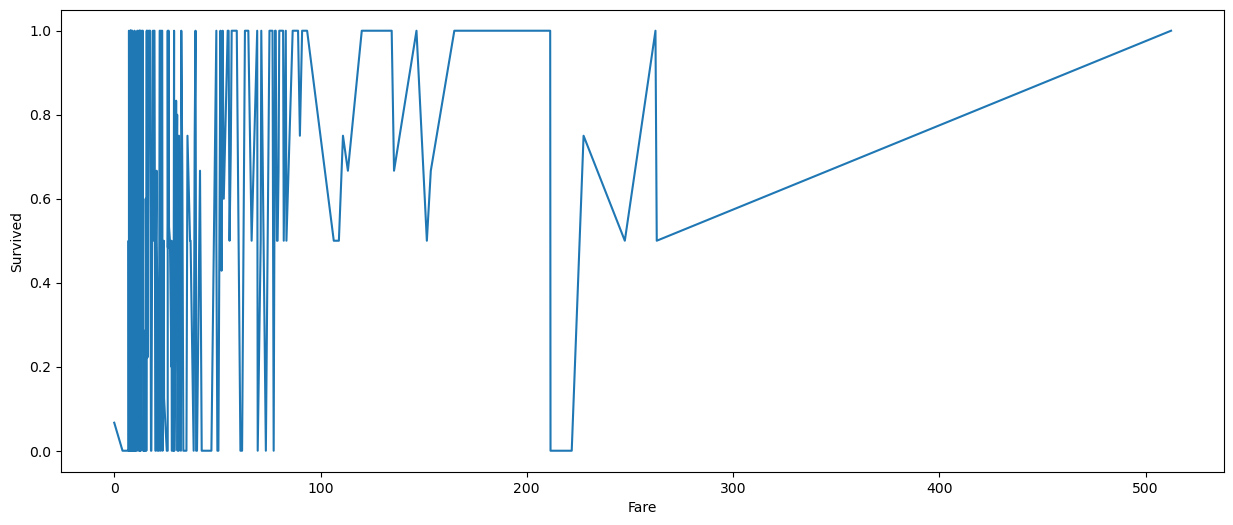

In [35]:
for i in numerical_columns:
    if i!= 'SalesPrice':
        plt.figure(figsize=(15,6))
        sns.lineplot(x = df[i],y = df['Survived'],data = df,ci = None,palette ='hls')
        plt.show()

In [36]:
#by using pivot table we can get the average/mean of the people survived and not survived
pd.pivot_table(df, index = 'Survived',
                values = ['Age','Pclass','SibSp','Parch','Fare'])

Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.415100  22.117887  0.329690  2.531876  0.553734
1         28.549778  48.395408  0.464912  1.950292  0.473684

In [37]:
#To get Mean age of Male and Female
df.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [38]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [39]:
df.groupby('Fare')['Age'].mean()

Fare
0.0000      32.239529
4.0125      20.000000
5.0000      33.000000
6.2375      61.000000
6.4375      34.500000
              ...    
227.5250    31.924779
247.5208    37.000000
262.3750    19.500000
263.0000    32.500000
512.3292    35.333333
Name: Age, Length: 248, dtype: float64

In [40]:
df

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]

In [41]:
#to perform on categorical data we need to convert categorical to numerical
df = pd.get_dummies(df, columns = object_columns,drop_first=True)

In [42]:
df

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0           0       3  22.000000      1      0   7.2500         1           0   
1           1       1  38.000000      1      0  71.2833         0           0   
2           1       3  26.000000      0      0   7.9250         0           0   
3           1       1  35.000000      1      0  53.1000         0           0   
4           0       3  35.000000      0      0   8.0500         1           0   
..        ...     ...        ...    ...    ...      ...       ...         ...   
886         0       2  27.000000      0      0  13.0000         1           0   
887         1       1  19.000000      0      0  30.0000         0           0   
888         0       3  29.699118      1      2  23.4500         0           0   
889         1       1  26.000000      0      0  30.0000         1           0   
890         0       3  32.000000      0      0   7.7500         1           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

In [43]:
corr1 = df.corr()
corr1

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500   
Age        -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566   
SibSp      -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000   
Sex_male   -0.543351  0.131900  0.084153 -0.114631 -0.245489 -0.182333   
Embarked_Q  0.003650  0.221009 -0.013855 -0.026354 -0.081228 -0.117216   
Embarked_S -0.149683  0.074053 -0.019336  0.068734  0.060814 -0.162184   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -0.543351    0.003650   -0.149683  
Pclass      0.131900    0.221009    0.074053  
Age         0.084153   -0.013855   -0.019336  
SibSp      -0.114631   -0.026354    0.068734  
Parch      -0.245489   -0.081228    0.060814  
Fare       -0.182333   -0.117216   -0.162184  
Sex_male    1.000000   -0.074115    0.119224  
Embarked_Q -0.074115    1.000000   -0.499421  
Embarked_S  0.119224   -0.499421    1.000000

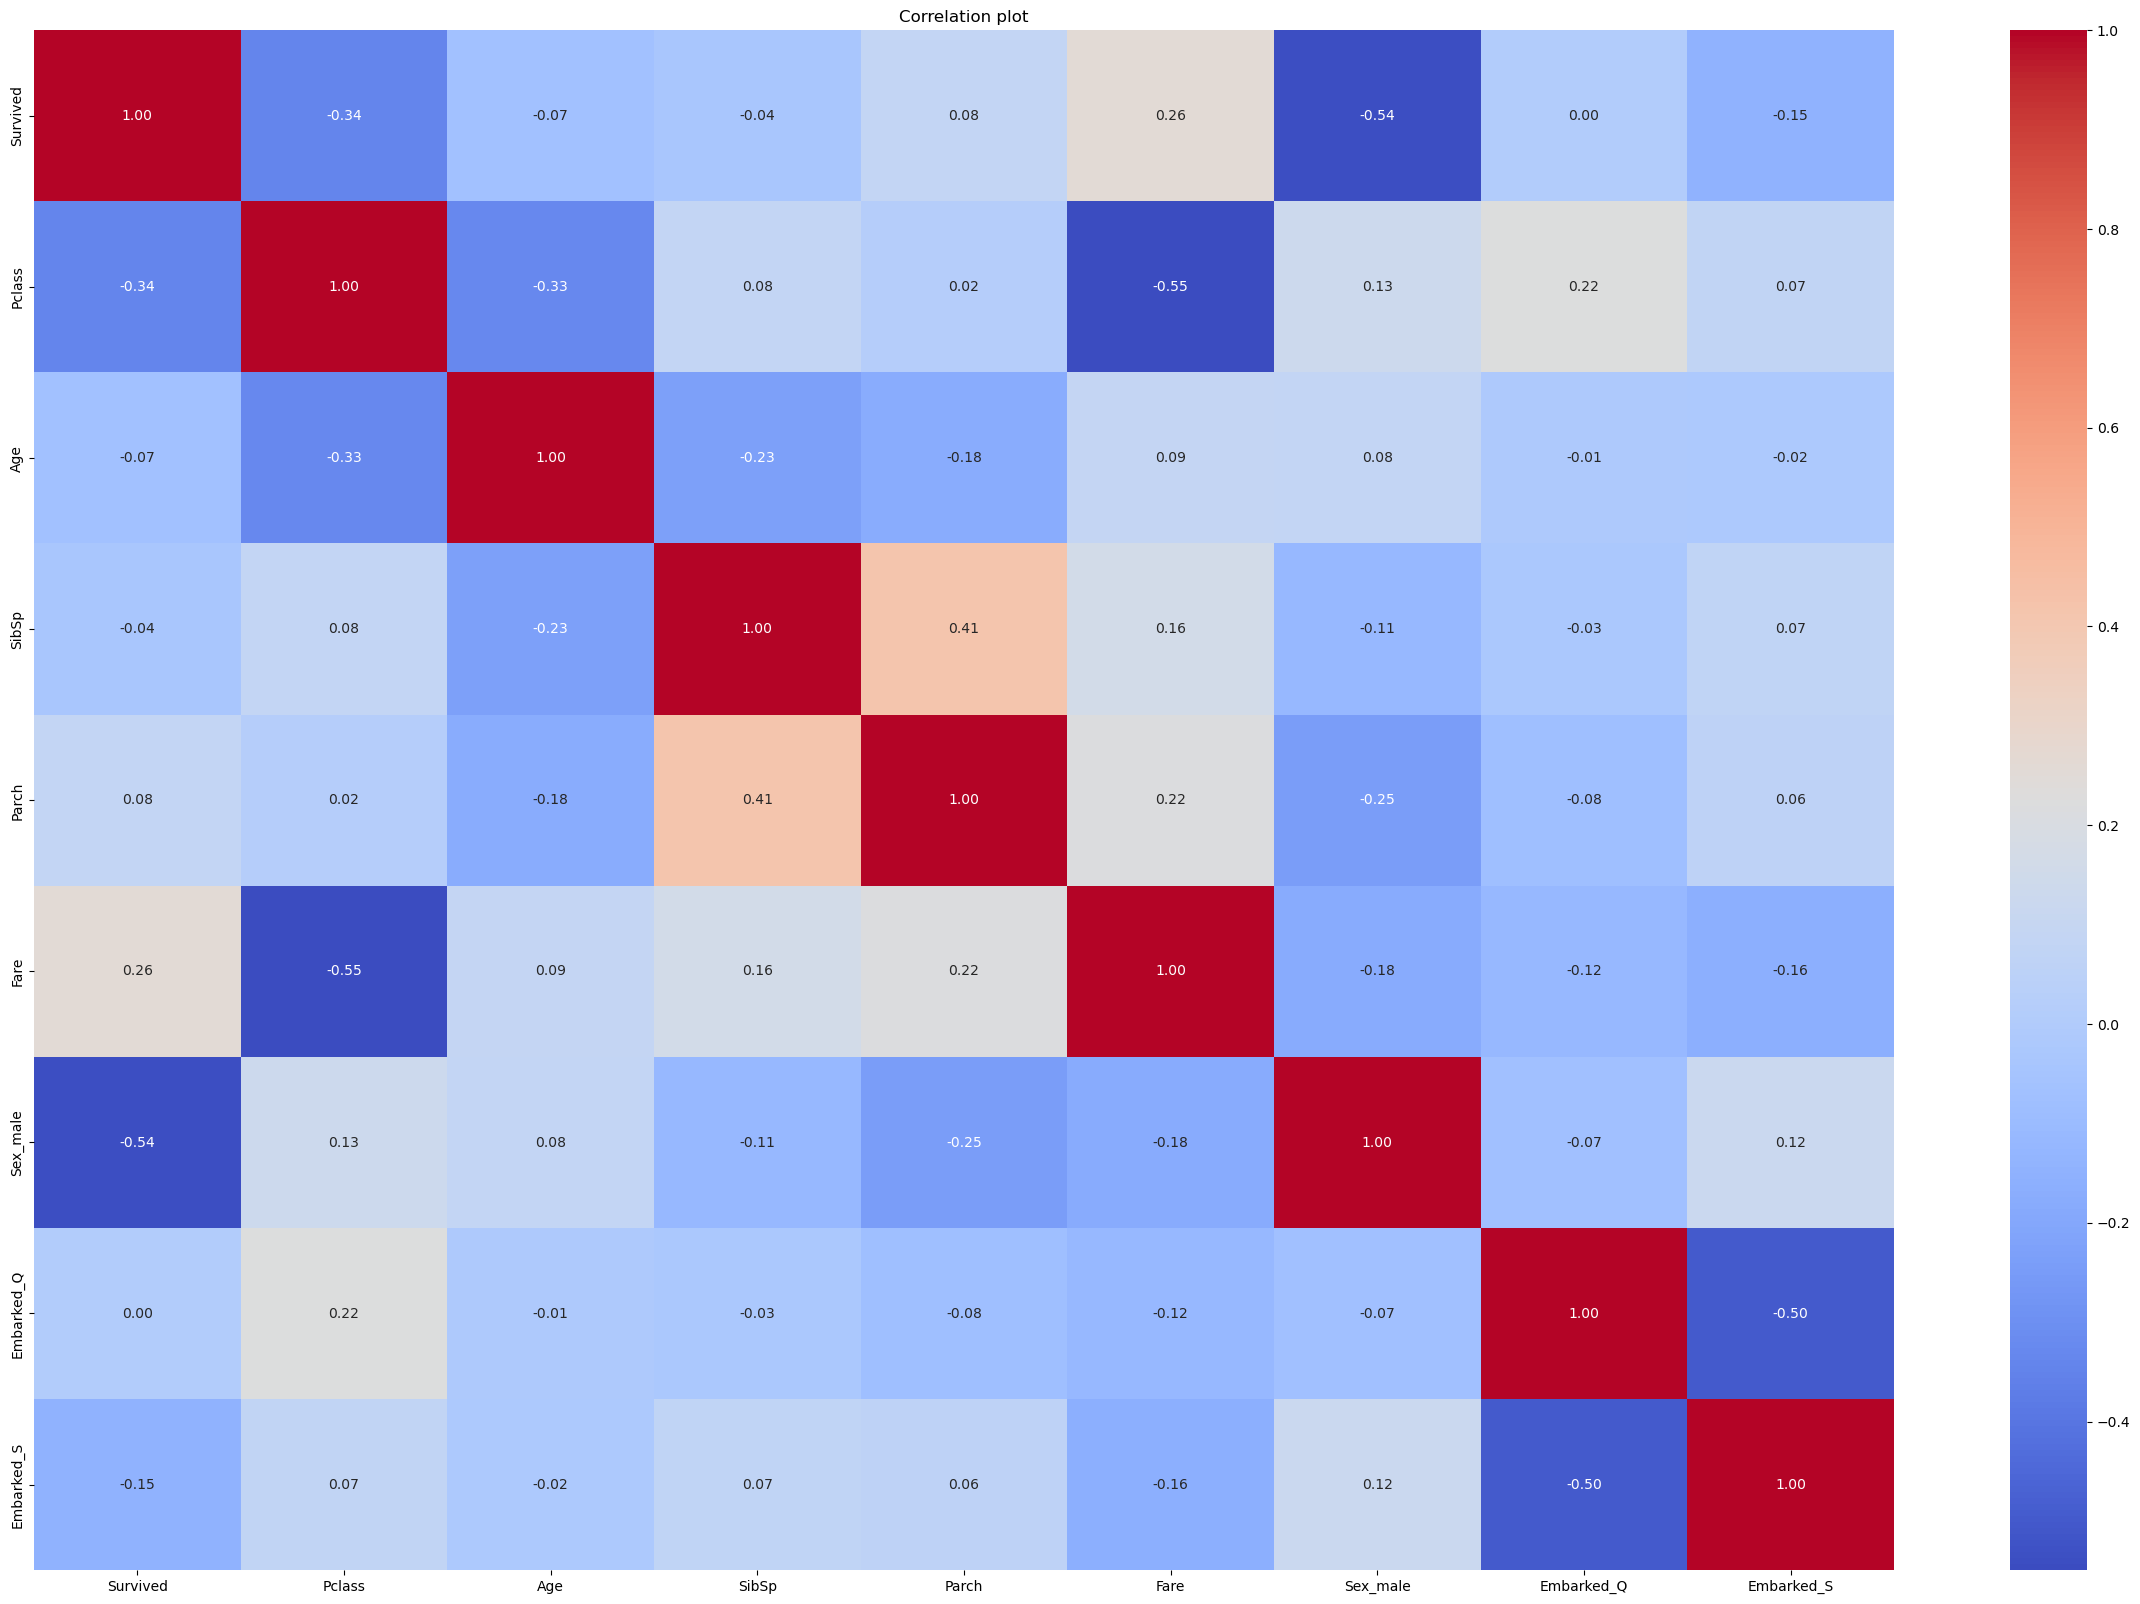

In [44]:
plt.figure(figsize=(30,20))
sns.heatmap(corr1,annot = True,cmap='coolwarm',fmt =".2f")
plt.title('Correlation plot')
plt.show()

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [46]:
df2 = df[['Age']]

In [47]:
columns_to_scale =['Age','Fare']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [48]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [49]:
df

Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3  0.271174      1      0  0.014151         1           0   
1           1       1  0.472229      1      0  0.139136         0           0   
2           1       3  0.321438      0      0  0.015469         0           0   
3           1       1  0.434531      1      0  0.103644         0           0   
4           0       3  0.434531      0      0  0.015713         1           0   
..        ...     ...       ...    ...    ...       ...       ...         ...   
886         0       2  0.334004      0      0  0.025374         1           0   
887         1       1  0.233476      0      0  0.058556         0           0   
888         0       3  0.367921      1      2  0.045771         0           0   
889         1       1  0.321438      0      0  0.058556         1           0   
890         0       3  0.396833      0      0  0.015127         1           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20,stratify = y,random_state = 42)
#stratify is used to split the data into equal proportion

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

print("accuracy_score", score)

accuracy_score 0.8044692737430168


DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier


In [56]:
dt_model =DecisionTreeClassifier()

In [57]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred_dt = dt_model.predict(X_test)

In [59]:
dt_score = accuracy_score(y_test,y_pred_dt)

print("accuracy_score", dt_score)

accuracy_score 0.7932960893854749


Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_classifier = RandomForestClassifier()

In [62]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred_rf = rf_classifier.predict(X_test)

In [64]:
rf_score = accuracy_score(y_test,y_pred_rf)

print("accuracy_score", rf_score)

accuracy_score 0.8268156424581006


In [65]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [66]:
precision = precision_score(y_test,y_pred_rf)
print(precision)

0.8064516129032258


In [67]:
recall = recall_score(y_test,y_pred_rf)
print(recall)

0.7246376811594203


In [68]:
f1 = f1_score(y_test,y_pred_rf)
print(f1)

0.7633587786259542


In [69]:
cm = confusion_matrix(y_test,y_pred_rf)
print(cm)

[[98 12]
 [19 50]]


In [70]:
cl = classification_report(y_test,y_pred_rf)
print(cl)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

